In [1]:
library(ggplot2)
library(ggrepel)
library(gridExtra)
library(limma)
library(reshape2)

sessionInfo()

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'ggrepel' was built under R version 4.2.3"
Warning message:
"package 'gridExtra' was built under R version 4.2.3"
Warning message:
"package 'limma' was built under R version 4.2.3"
Warning message:
"package 'reshape2' was built under R version 4.2.3"


R version 4.2.0 (2022-04-22)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server 7.9 (Maipo)

Matrix products: default
BLAS/LAPACK: /broad/moothalab/sandbox/tdurham/anaconda/envs/tmt_prot_analysis2/lib/libopenblasp-r0.3.29.so

locale:
[1] C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] reshape2_1.4.4 limma_3.54.0   gridExtra_2.3  ggrepel_0.9.5  ggplot2_3.5.1 

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.12       plyr_1.8.9        pillar_1.9.0      compiler_4.2.0   
 [5] base64enc_0.1-3   tools_4.2.0       digest_0.6.36     uuid_1.2-0       
 [9] jsonlite_1.8.8    evaluate_0.24.0   lifecycle_1.0.4   tibble_3.2.1     
[13] gtable_0.3.5      pkgconfig_2.0.3   rlang_1.1.4       IRdisplay_1.1    
[17] cli_3.6.3         IRkernel_1.3.2    fastmap_1.2.0     stringr_1.5.1    
[21] repr_1.1.7        withr_3.0.0       dplyr_1.1.4       generics_0.1.3   
[25] vctrs_0

In [2]:
de_data = read.csv('./exp_data.for_de.csv')
head(de_data)

,normoxia_mono_2,normoxia_mono_3,normoxia_mono_4,normoxia_PFF_1,normoxia_PFF_2,normoxia_PFF_3,normoxia_PFF_4,hypoxia_mono_2,hypoxia_mono_3,hypoxia_mono_4,hypoxia_PFF_1,hypoxia_PFF_2,hypoxia_PFF_4,GeneID,ProteinID
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,15033.80,15082.20,13905.80,14342.60,14181.80,16009.20,14462.30,14979.30,14093.20,14476.20,14401.3,14374.10,14950.20,Pkm,P52480-2
2,13216.80,13089.60,12775.50,13217.10,13033.70,13329.10,12735.50,12576.40,13115.50,12733.70,12933.8,12663.50,13405.60,Atp6v1b2,P62814
3,17929.40,17077.40,17062.40,17809.00,17943.70,17315.50,16938.80,16892.10,16828.00,16115.60,16759.3,17043.30,16937.10,Uba1,Q02053
4,15629.60,14548.70,14927.90,15452.40,15433.80,14369.00,13824.10,14273.20,15114.80,13344.60,14761.4,14744.90,14190.50,Tuba1a,P68369
5,8476.08,9521.08,11679.00,9199.57,7897.93,9509.57,15231.30,27909.50,20028.40,30447.30,15399.1,16189.90,25463.10,Hbb-b1,P02088
6,3798.64,4378.21,4945.66,4322.20,4000.23,4218.80,6903.31,7693.49,5216.03,4831.52,4187.7,5737.19,4355.66,Hspg2,E9PZ16


In [3]:
obs_meta <- read.csv('./sample_metadata.for_de.csv')
rownames(obs_meta) <- obs_meta$label
head(obs_meta)

,label,o2_status,monomer_or_pff,rep,exp_condition,Injection.date,Harvest.date,Pole.test.latency..sec.,Cage.test.latency..sec.
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
normoxia_mono_2,normoxia_mono_2,normoxia,mono,2,normoxia_mono,8/19/2023,11/30/2023,5.833333,50.43333
normoxia_mono_3,normoxia_mono_3,normoxia,mono,3,normoxia_mono,8/20/2023,11/30/2023,6.966667,55.16667
normoxia_mono_4,normoxia_mono_4,normoxia,mono,4,normoxia_mono,8/20/2023,11/30/2023,7.300000,62.30000
normoxia_PFF_1,normoxia_PFF_1,normoxia,PFF,1,normoxia_PFF,8/19/2023,11/29/2023,8.933333,89.43333
normoxia_PFF_2,normoxia_PFF_2,normoxia,PFF,2,normoxia_PFF,8/19/2023,11/29/2023,8.966667,52.80000
normoxia_PFF_3,normoxia_PFF_3,normoxia,PFF,3,normoxia_PFF,8/20/2023,11/29/2023,10.233330,55.40000


In [4]:
gene_meta <- de_data[c('ProteinID', 'GeneID')]
expr_data <- de_data[which(! (colnames(de_data) %in% c('ProteinID', 'GeneID')))]
head(expr_data)
#dge_obj <- DGEList(counts=expr_data, genes=gene_meta, group=obs_meta[colnames(expr_data), 'condition'])
#print(dge_obj)

,normoxia_mono_2,normoxia_mono_3,normoxia_mono_4,normoxia_PFF_1,normoxia_PFF_2,normoxia_PFF_3,normoxia_PFF_4,hypoxia_mono_2,hypoxia_mono_3,hypoxia_mono_4,hypoxia_PFF_1,hypoxia_PFF_2,hypoxia_PFF_4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,15033.80,15082.20,13905.80,14342.60,14181.80,16009.20,14462.30,14979.30,14093.20,14476.20,14401.3,14374.10,14950.20
2,13216.80,13089.60,12775.50,13217.10,13033.70,13329.10,12735.50,12576.40,13115.50,12733.70,12933.8,12663.50,13405.60
3,17929.40,17077.40,17062.40,17809.00,17943.70,17315.50,16938.80,16892.10,16828.00,16115.60,16759.3,17043.30,16937.10
4,15629.60,14548.70,14927.90,15452.40,15433.80,14369.00,13824.10,14273.20,15114.80,13344.60,14761.4,14744.90,14190.50
5,8476.08,9521.08,11679.00,9199.57,7897.93,9509.57,15231.30,27909.50,20028.40,30447.30,15399.1,16189.90,25463.10
6,3798.64,4378.21,4945.66,4322.20,4000.23,4218.80,6903.31,7693.49,5216.03,4831.52,4187.7,5737.19,4355.66


In [5]:
apply(expr_data, 2, min)

normoxia_mono_2 normoxia_mono_3 normoxia_mono_4  normoxia_PFF_1  normoxia_PFF_2 
        4.36822         3.38950         7.83036         0.00000         0.00000 
 normoxia_PFF_3  normoxia_PFF_4  hypoxia_mono_2  hypoxia_mono_3  hypoxia_mono_4 
        0.00000         0.00000         8.76666         0.00000         4.13521 
  hypoxia_PFF_1   hypoxia_PFF_2   hypoxia_PFF_4 
        0.00000         8.05054         3.25145

In [6]:
expr_data <- log(expr_data + 1, 2)
head(expr_data)

,normoxia_mono_2,normoxia_mono_3,normoxia_mono_4,normoxia_PFF_1,normoxia_PFF_2,normoxia_PFF_3,normoxia_PFF_4,hypoxia_mono_2,hypoxia_mono_3,hypoxia_mono_4,hypoxia_PFF_1,hypoxia_PFF_2,hypoxia_PFF_4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,13.87602,13.88065,13.76350,13.80812,13.79185,13.96670,13.82011,13.87078,13.78281,13.82149,13.81401,13.81128,13.86797
2,13.69019,13.67624,13.64121,13.69023,13.67007,13.70240,13.63668,13.61855,13.67910,13.63648,13.65897,13.62850,13.71066
3,14.13012,14.05989,14.05862,14.12040,14.13127,14.07986,14.04813,14.04415,14.03866,13.97626,14.03276,14.05700,14.04798
4,13.93209,13.82870,13.86582,13.91564,13.91390,13.81077,13.75500,13.80112,13.88377,13.70408,13.84964,13.84803,13.79274
5,13.04935,13.21706,13.51175,13.16751,12.94744,13.21532,13.89485,14.76852,14.28983,14.89407,13.91065,13.98290,14.63618
6,11.89165,12.09645,12.27224,12.07788,11.96623,12.04296,12.75328,12.90961,12.34901,12.23856,12.03229,12.48638,12.08901


In [7]:
de_data[colnames(expr_data)] <- expr_data

In [8]:
test <- melt(de_data, id.vars=c('ProteinID', 'GeneID'), value.name='expr')
head(test)

,ProteinID,GeneID,variable,expr
,<chr>,<chr>,<fct>,<dbl>
1,P52480-2,Pkm,normoxia_mono_2,13.87602
2,P62814,Atp6v1b2,normoxia_mono_2,13.69019
3,Q02053,Uba1,normoxia_mono_2,14.13012
4,P68369,Tuba1a,normoxia_mono_2,13.93209
5,P02088,Hbb-b1,normoxia_mono_2,13.04935
6,E9PZ16,Hspg2,normoxia_mono_2,11.89165


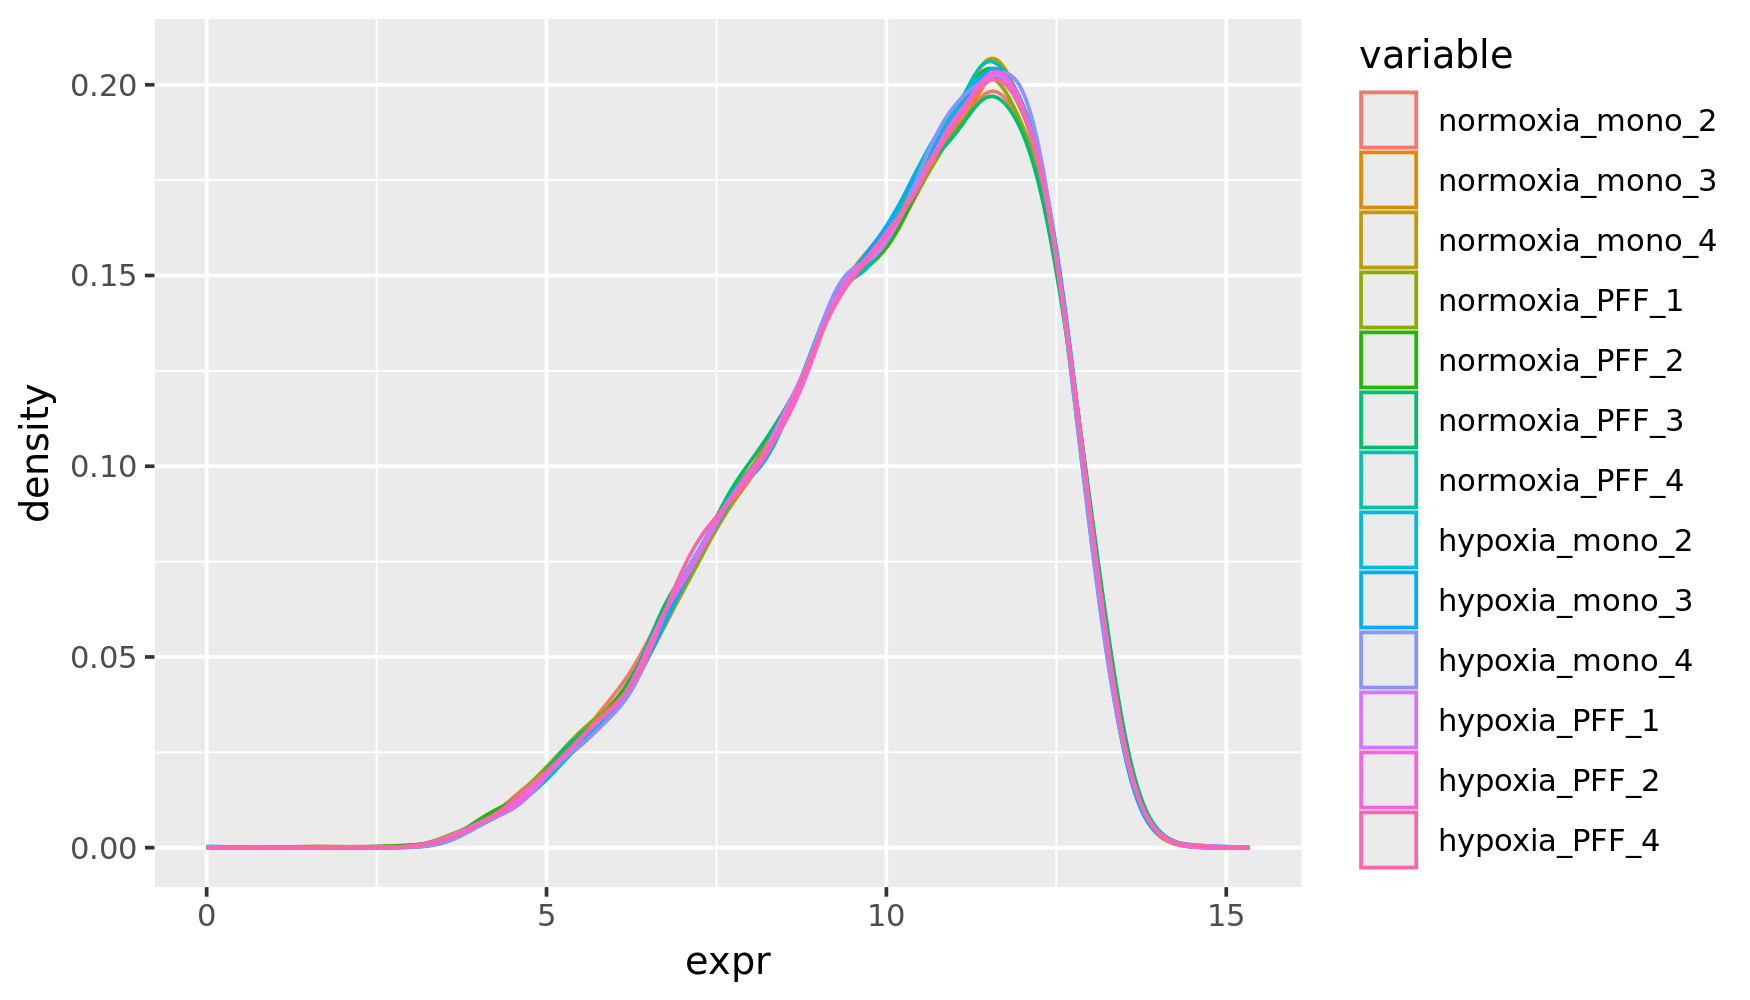

In [9]:
options(repr.plot.width = 7, repr.plot.height = 4, repr.plot.res = 250)
ggplot(data=test, aes(expr, colour=variable)) + geom_density()

In [10]:
medians <- apply(expr_data, 2, median)
medians

normoxia_mono_2 normoxia_mono_3 normoxia_mono_4  normoxia_PFF_1  normoxia_PFF_2 
       10.32918        10.34583        10.38370        10.34585        10.37442 
 normoxia_PFF_3  normoxia_PFF_4  hypoxia_mono_2  hypoxia_mono_3  hypoxia_mono_4 
       10.32812        10.37438        10.36017        10.37178        10.37638 
  hypoxia_PFF_1   hypoxia_PFF_2   hypoxia_PFF_4 
       10.35565        10.35727        10.34812

In [11]:
de_data_norm <- data.frame(de_data)
de_data_norm[colnames(expr_data)] <- normalizeMedianValues(expr_data)
test_norm <- melt(de_data_norm, id.vars=c('ProteinID', 'GeneID'), value.name='expr')

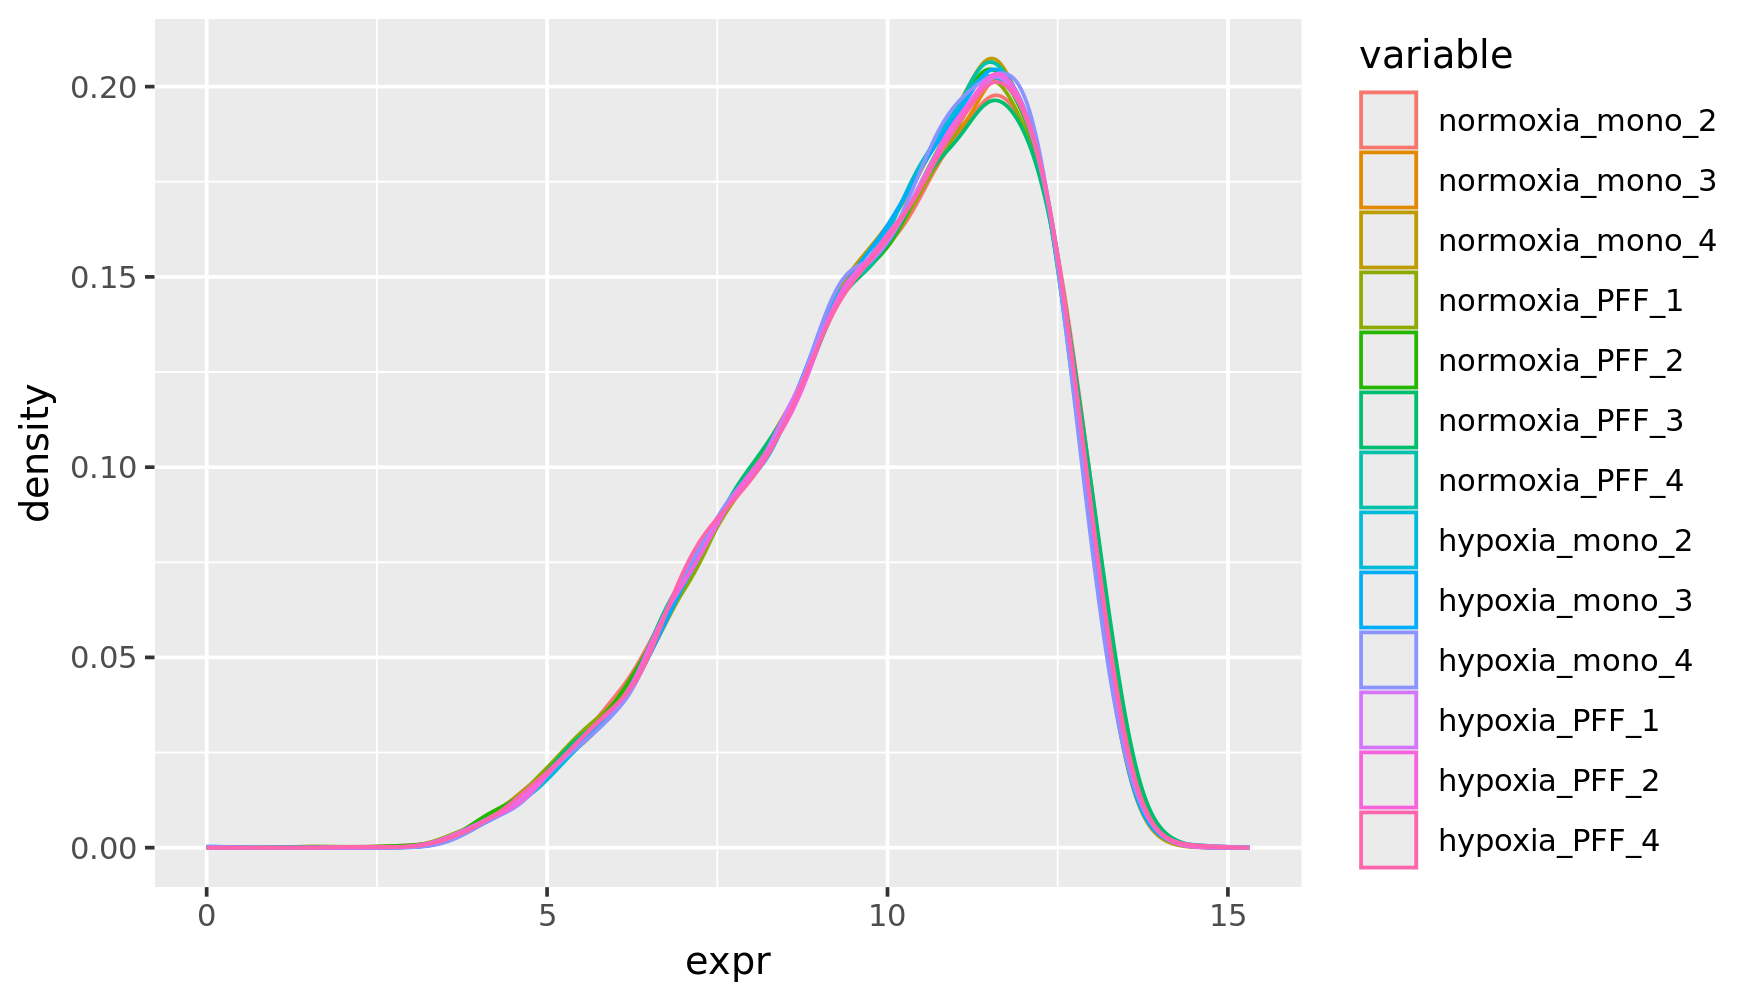

In [12]:
options(repr.plot.width = 7, repr.plot.height = 4, repr.plot.res = 250)
ggplot(data=test_norm, aes(expr, colour=variable)) + geom_density()

Warning message:
"Removed 9970 rows containing non-finite outside the scale range (`stat_density()`)."


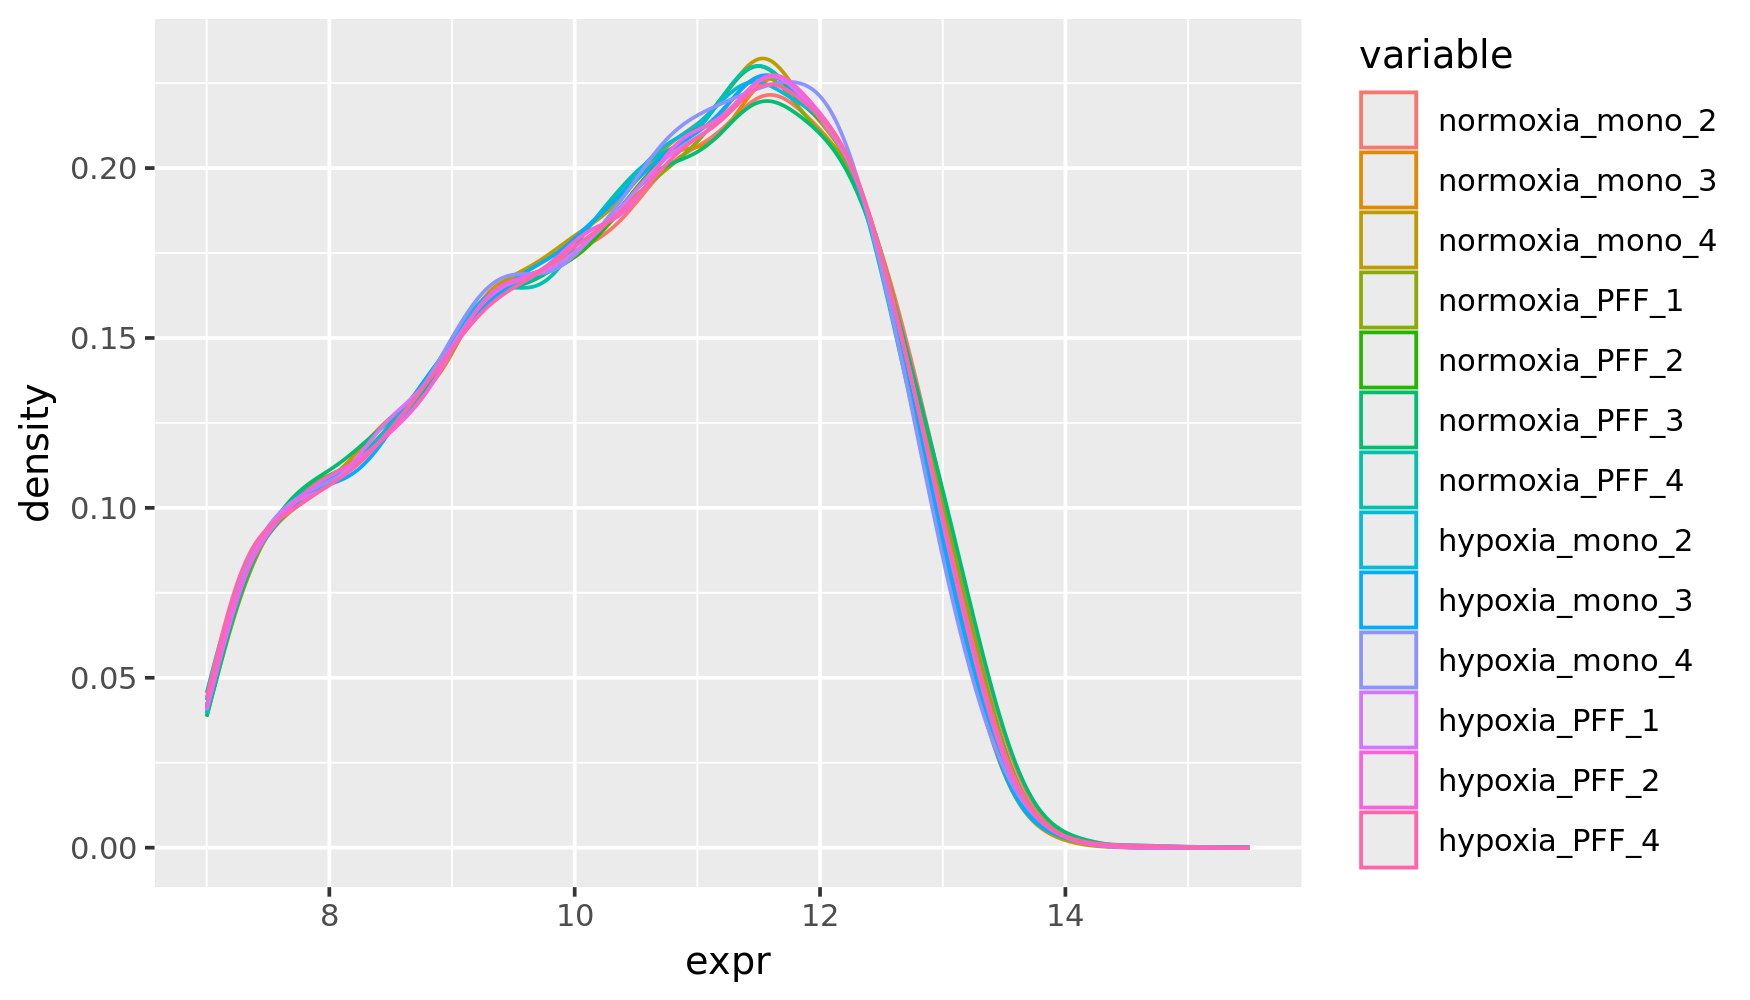

In [13]:
options(repr.plot.width = 7, repr.plot.height = 4, repr.plot.res = 250)
ggplot(data=test_norm, aes(expr, colour=variable)) + geom_density() + xlim(7, 15.5)

In [14]:
gene_meta <- de_data_norm[c('ProteinID', 'GeneID')]
expr_data <- de_data_norm[which(! (colnames(de_data_norm) %in% c('ProteinID', 'GeneID')))]
head(expr_data)
#dge_obj_norm <- DGEList(counts=expr_data, genes=gene_meta, group=obs_meta[colnames(expr_data), 'condition'])
#print(dge_obj_norm)

,normoxia_mono_2,normoxia_mono_3,normoxia_mono_4,normoxia_PFF_1,normoxia_PFF_2,normoxia_PFF_3,normoxia_PFF_4,hypoxia_mono_2,hypoxia_mono_3,hypoxia_mono_4,hypoxia_PFF_1,hypoxia_PFF_2,hypoxia_PFF_4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,13.91439,13.89664,13.72909,13.82399,13.76968,14.00676,13.79794,13.86753,13.76416,13.79668,13.81680,13.81192,13.88086
2,13.72805,13.69200,13.60710,13.70597,13.64809,13.74170,13.61481,13.61536,13.66059,13.61199,13.66173,13.62913,13.72340
3,14.16919,14.07608,14.02347,14.13663,14.10855,14.12024,14.02560,14.04086,14.01967,13.95116,14.03560,14.05765,14.06104
4,13.97061,13.84463,13.83115,13.93163,13.89153,13.85038,13.73294,13.79789,13.86498,13.67947,13.85244,13.84866,13.80556
5,13.08544,13.23228,13.47797,13.18265,12.92663,13.25322,13.87256,14.76506,14.27050,14.86733,13.91346,13.98354,14.64978
6,11.92453,12.11039,12.24156,12.09177,11.94699,12.07750,12.73283,12.90659,12.33230,12.21658,12.03472,12.48695,12.10024


In [15]:
grps <- obs_meta[colnames(expr_data), 'exp_condition']
design <- model.matrix(~ grps - 1)
colnames(design) <- sub('grps', '', colnames(design))
design

,hypoxia_PFF,hypoxia_mono,normoxia_PFF,normoxia_mono
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,1,0
5,0,0,1,0
6,0,0,1,0
7,0,0,1,0
8,0,1,0,0
9,0,1,0,0
10,0,1,0,0


In [16]:
fit <- lmFit(expr_data, design=design)

In [17]:
de_data_norm['GeneID2'] <- paste0(de_data_norm[['GeneID']], '_', de_data_norm[['ProteinID']])
de_data_norm <- de_data_norm[!(colnames(de_data_norm) %in% c('GeneID', 'ProteinID'))]
de_data_norm['GeneID'] <- de_data_norm['GeneID2']
de_data_norm['GeneID2'] <- NULL
col_order <- c('GeneID', 'normoxia_mono_2', 'normoxia_mono_3', 'normoxia_mono_4',
               'normoxia_PFF_1', 'normoxia_PFF_2', 'normoxia_PFF_3', 'normoxia_PFF_4',
               'hypoxia_mono_2', 'hypoxia_mono_3', 'hypoxia_mono_4',
               'hypoxia_PFF_1', 'hypoxia_PFF_2', 'hypoxia_PFF_4')
de_data_norm <- de_data_norm[col_order]
head(de_data_norm)

,GeneID,normoxia_mono_2,normoxia_mono_3,normoxia_mono_4,normoxia_PFF_1,normoxia_PFF_2,normoxia_PFF_3,normoxia_PFF_4,hypoxia_mono_2,hypoxia_mono_3,hypoxia_mono_4,hypoxia_PFF_1,hypoxia_PFF_2,hypoxia_PFF_4
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Pkm_P52480-2,13.91439,13.89664,13.72909,13.82399,13.76968,14.00676,13.79794,13.86753,13.76416,13.79668,13.81680,13.81192,13.88086
2,Atp6v1b2_P62814,13.72805,13.69200,13.60710,13.70597,13.64809,13.74170,13.61481,13.61536,13.66059,13.61199,13.66173,13.62913,13.72340
3,Uba1_Q02053,14.16919,14.07608,14.02347,14.13663,14.10855,14.12024,14.02560,14.04086,14.01967,13.95116,14.03560,14.05765,14.06104
4,Tuba1a_P68369,13.97061,13.84463,13.83115,13.93163,13.89153,13.85038,13.73294,13.79789,13.86498,13.67947,13.85244,13.84866,13.80556
5,Hbb-b1_P02088,13.08544,13.23228,13.47797,13.18265,12.92663,13.25322,13.87256,14.76506,14.27050,14.86733,13.91346,13.98354,14.64978
6,Hspg2_E9PZ16,11.92453,12.11039,12.24156,12.09177,11.94699,12.07750,12.73283,12.90659,12.33230,12.21658,12.03472,12.48695,12.10024


## PFF normoxia vs mono normoxia

In [18]:
contrast_name <- "normoxia_PFF-normoxia_mono"
contrast.matrix <- makeContrasts(contrast_name, levels = design)
#contrast.matrix <- makeContrasts(contrast_name, levels=c("hypoxia_PFF", "hypoxia_mono", "normoxia_PFF", "normoxia_mono", "Injection.date.code2"))
contrast.matrix

,normoxia_PFF-normoxia_mono
hypoxia_PFF,0
hypoxia_mono,0
normoxia_PFF,1
normoxia_mono,-1


In [19]:
fit2C <- contrasts.fit(fit, contrast.matrix)

In [20]:
fit2C <- eBayes(fit2C)
res <- topTable(fit2C, number=Inf, adjust.method='BH', sort.by='P')
res['neg_log_pval'] <- 0 - log(res['P.Value'], 10)
res['neg_log_padj'] <- 0 - log(res['adj.P.Val'], 10)
res[c('ProteinID', 'GeneSymbol')] <- gene_meta[rownames(res),]
head(res, 20)

,logFC,AveExpr,t,P.Value,adj.P.Val,B,neg_log_pval,neg_log_padj,ProteinID,GeneSymbol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
7740,0.2493775,6.643585,4.380623,0.0009698058,0.9995967,-1.573047,3.013315,0.0001751791,Q9R1S0,B9d1
6901,0.3820951,7.594598,4.345378,0.0010304534,0.9995967,-1.602895,2.986972,0.0001751791,A0A0G2JE87,Slc29a4
8108,-0.5061772,9.007243,-4.212864,0.0012962095,0.9995967,-1.717056,2.887325,0.0001751791,Q9JLY7,Dusp14
5349,-0.5234767,8.940301,-4.069335,0.0016658407,0.9995967,-1.844132,2.778367,0.0001751791,O35945,Aldh1a7
6648,-1.7782951,9.538855,-4.040917,0.0017511709,0.9995967,-1.869711,2.756671,0.0001751791,P04247,Mb
6817,-0.2529012,8.792169,-3.953783,0.0020421623,0.9995967,-1.948992,2.689910,0.0001751791,Q8K479,C1qtnf5
7338,0.2144900,7.762282,3.943208,0.0020807334,0.9995967,-1.958700,2.681784,0.0001751791,Q62011,Pdpn
6109,-0.2155645,7.760903,-3.936261,0.0021064844,0.9995967,-1.965088,2.676442,0.0001751791,Q8K004,Spata2
6428,-0.2392166,8.453263,-3.877053,0.0023397563,0.9995967,-2.019856,2.630829,0.0001751791,O35386,Phyh


In [21]:
sum(res$adj.P.Val < 0.05)

[1] 0

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


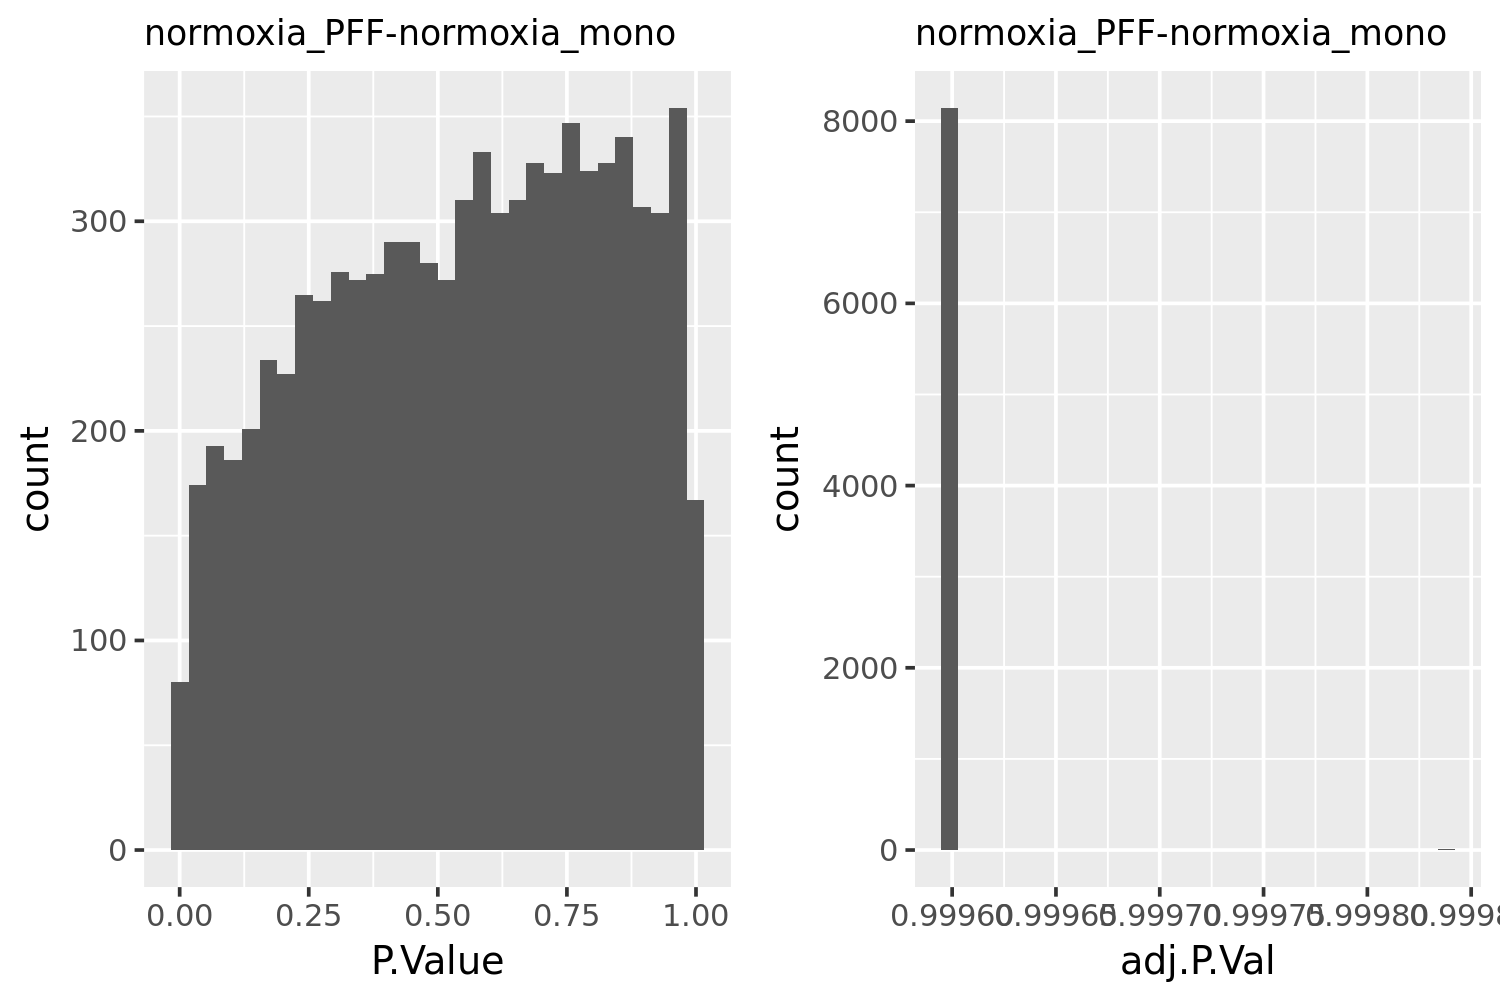

In [22]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 250)
pval_plot <- ggplot(data=res, aes(P.Value)) + geom_histogram() + ggtitle(contrast_name) + theme(plot.title = element_text(size=10))
qval_plot <- ggplot(data=res, aes(adj.P.Val)) + geom_histogram() + ggtitle(contrast_name) + theme(plot.title = element_text(size=10))
grid.arrange(pval_plot, qval_plot, ncol=2, widths=c(4,4))

Warning message:
"ggrepel: 203 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


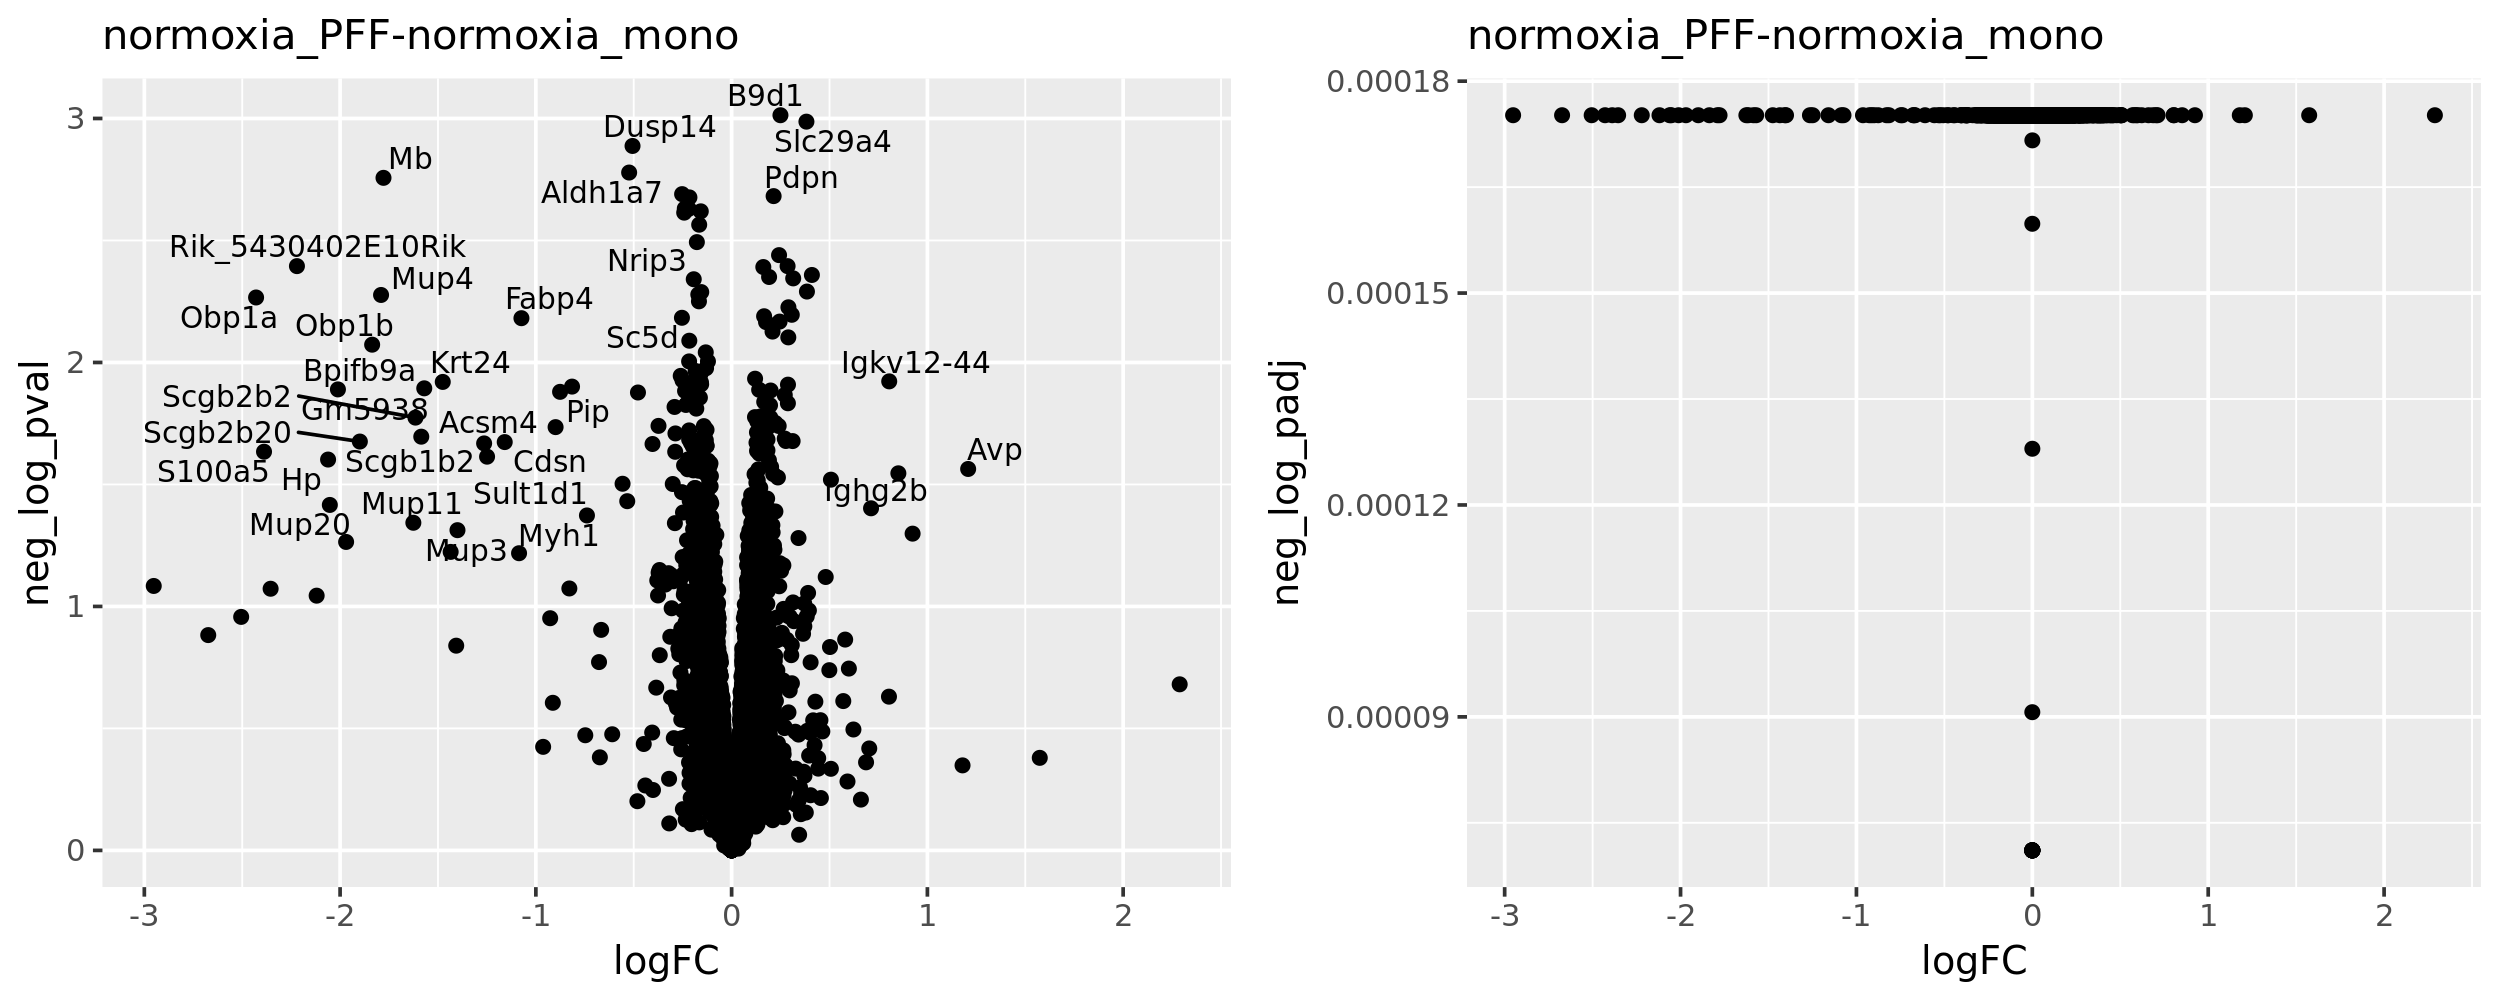

In [23]:
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 250)

pval_plot <- ggplot(data=res, aes(x=logFC, y=neg_log_pval)) + geom_point() + ggtitle(contrast_name) + theme(plot.title = element_text(size=12))
pval_plot <- pval_plot + ggrepel::geom_text_repel(data=dplyr::filter(res, P.Value < 0.05),
                                                  aes(label=GeneSymbol),
                                                  size=3, box.padding=unit(0.1, 'lines'),
                                                  point.padding=unit(0.1, 'lines'),
                                                  segment.size=0.5)

qval_plot <- ggplot(data=res, aes(x=logFC, y=neg_log_padj)) + geom_point() + ggtitle(contrast_name) + theme(plot.title = element_text(size=12))
qval_plot <- qval_plot + ggrepel::geom_text_repel(data=dplyr::filter(res, adj.P.Val < 0.05),
                                                  aes(label=GeneSymbol),
                                                  size=3, box.padding=unit(0.1, 'lines'),
                                                  point.padding=unit(0.1, 'lines'),
                                                  segment.size=0.5)

grid.arrange(pval_plot, qval_plot, ncol=2, widths=c(4,4))

In [24]:
#write.csv(res, './pd_tmt_proteomics.limma_DE_analysis.normoxia_PFF_vs_normoxia_mono.csv')

## PFF hypoxia vs mono hypoxia

In [25]:
contrast_name <- "hypoxia_PFF-hypoxia_mono"
contrast.matrix <- makeContrasts(contrast_name, levels = design)
contrast.matrix

,hypoxia_PFF-hypoxia_mono
hypoxia_PFF,1
hypoxia_mono,-1
normoxia_PFF,0
normoxia_mono,0


In [26]:
fit2C <- contrasts.fit(fit, contrast.matrix)
fit2C <- eBayes(fit2C)
res <- topTable(fit2C, number=Inf, adjust.method='BH', sort.by='P')
res['neg_log_pval'] <- 0 - log(res['P.Value'], 10)
res['neg_log_padj'] <- 0 - log(res['adj.P.Val'], 10)
res[c('ProteinID', 'GeneSymbol')] <- gene_meta[rownames(res),]
head(res, 20)

,logFC,AveExpr,t,P.Value,adj.P.Val,B,neg_log_pval,neg_log_padj,ProteinID,GeneSymbol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
6252,-0.9058270,6.380162,-6.719704,2.531655e-05,0.2064818,-0.3080549,4.596596,0.6851183,A0A0A6YXW6,Igha
7239,-0.4495542,3.998924,-5.652506,1.215567e-04,0.4957084,-0.8524656,3.915221,0.3047737,Q9EPQ8,Tcf20
4235,-0.2899536,11.670114,-5.016368,3.339637e-04,0.7819990,-1.2533025,3.476301,0.1067938,P55065,Pltp
8020,-0.4042195,5.154452,-4.931969,3.835208e-04,0.7819990,-1.3112794,3.416211,0.1067938,Q62170,Selplg
5115,-0.2170171,8.730537,-4.609621,6.564560e-04,0.8611724,-1.5435494,3.182794,0.0649099,A8Y5H7-3,Sec14l1
5980,-0.7487392,7.983777,-4.484946,8.111656e-04,0.8611724,-1.6380629,3.090890,0.0649099,Q02013,Aqp1
6208,-0.2427299,7.864160,-4.271107,1.171556e-03,0.8611724,-1.8063105,2.931237,0.0649099,Q9CQ56,Use1
7694,-0.2885004,7.049594,-4.103001,1.570301e-03,0.8611724,-1.9440153,2.804017,0.0649099,Q8BK62,Olfml3
6222,-0.6311941,6.706612,-4.056676,1.703305e-03,0.8611724,-1.9827983,2.768708,0.0649099,A0A571BF69,Mgam


In [27]:
sum(res$adj.P.Val < 0.05)

[1] 0

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


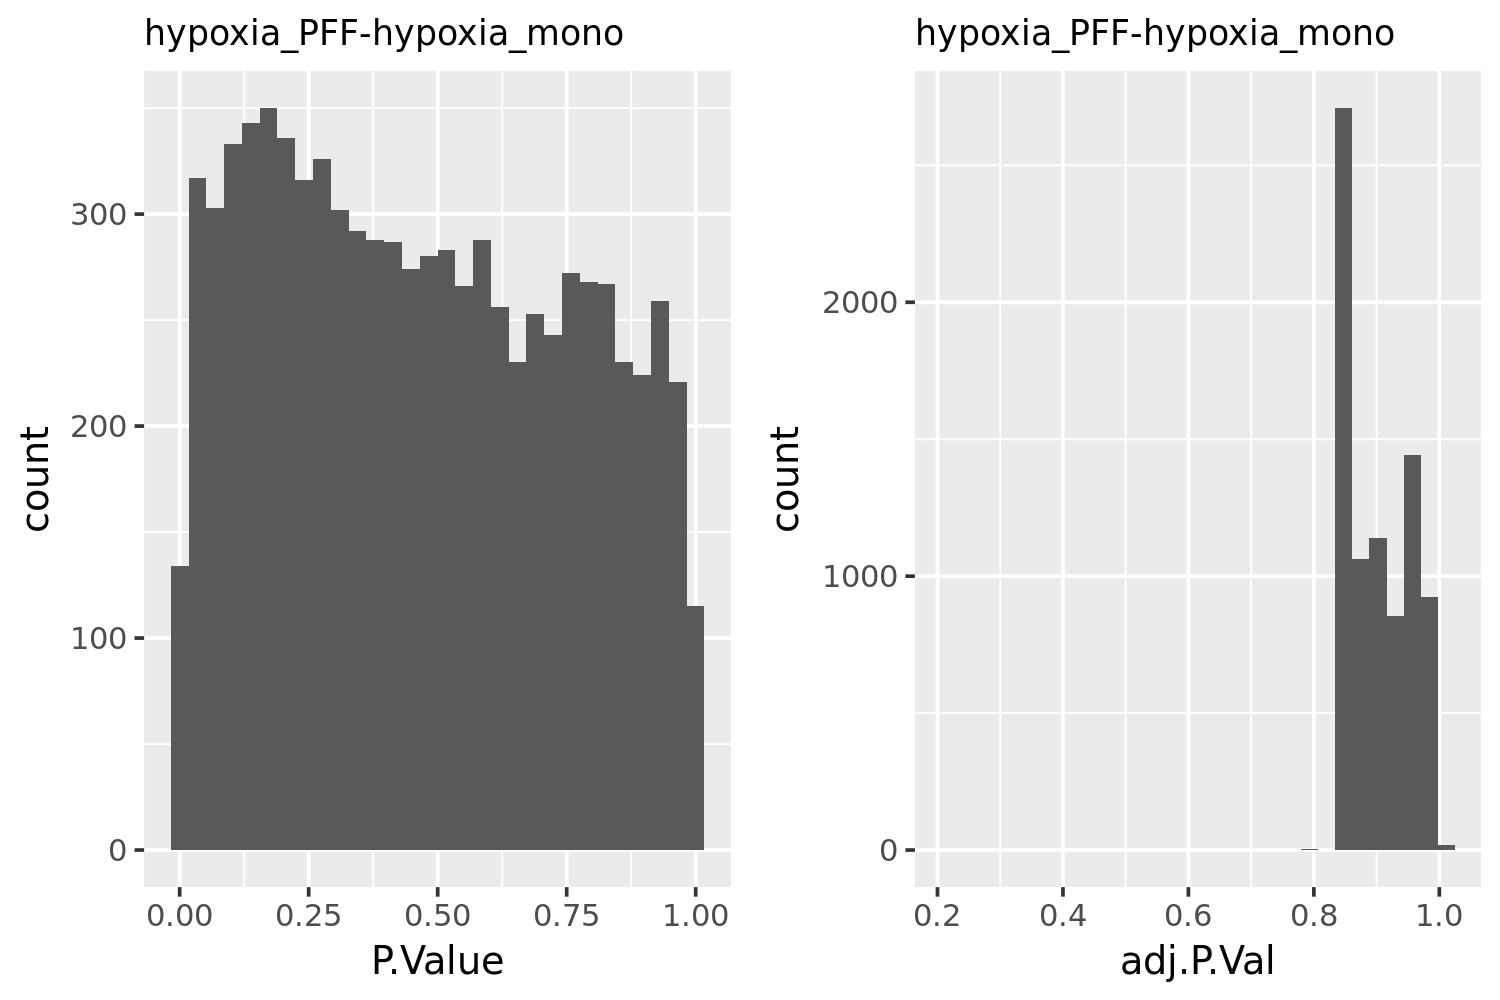

In [28]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 250)
pval_plot <- ggplot(data=res, aes(P.Value)) + geom_histogram() + ggtitle(contrast_name) + theme(plot.title = element_text(size=10))
qval_plot <- ggplot(data=res, aes(adj.P.Val)) + geom_histogram() + ggtitle(contrast_name) + theme(plot.title = element_text(size=10))
grid.arrange(pval_plot, qval_plot, ncol=2, widths=c(4,4))

Warning message:
"ggrepel: 422 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


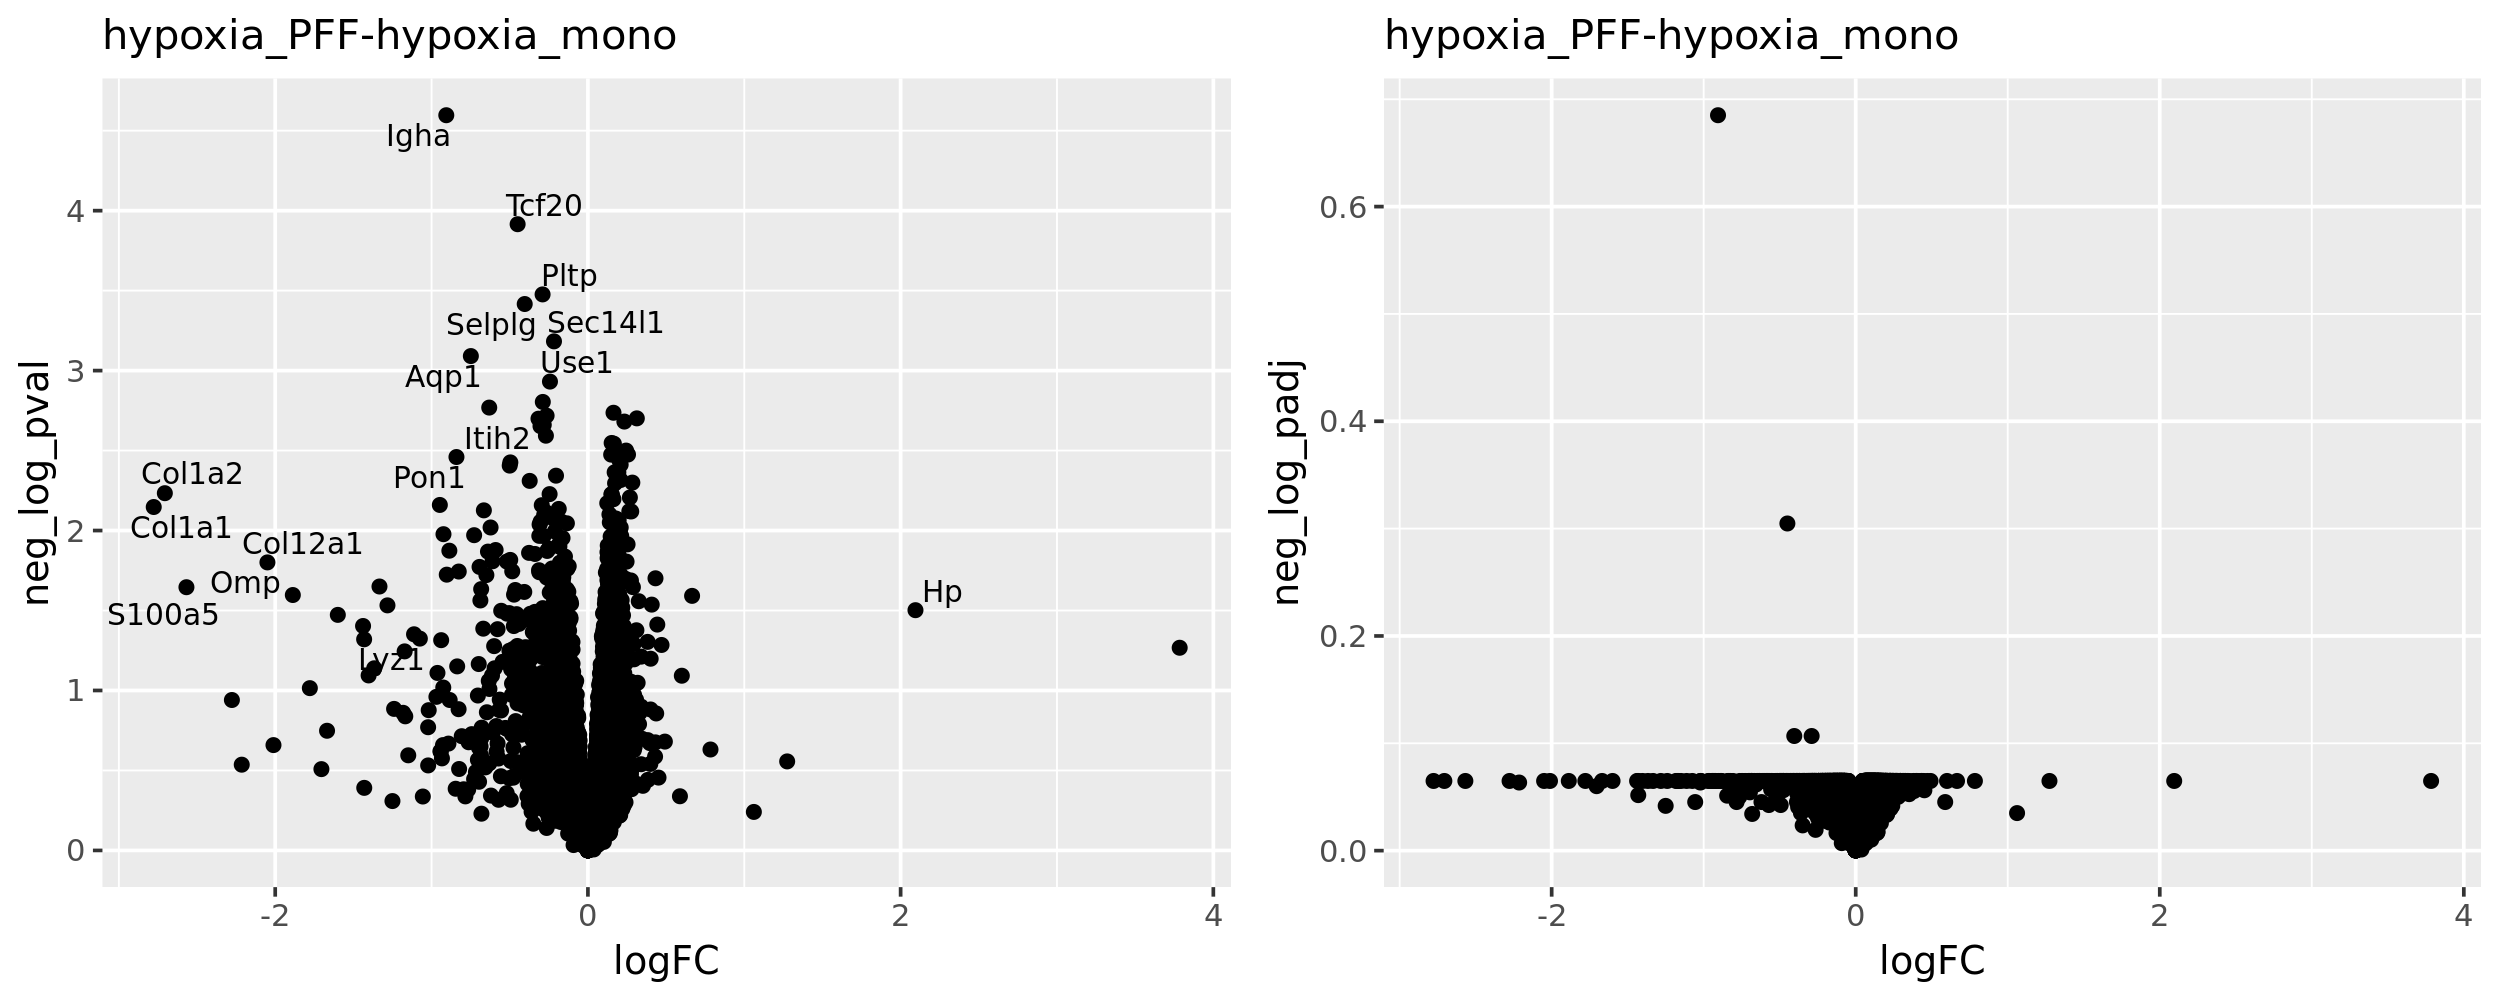

In [29]:
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 250)

pval_plot <- ggplot(data=res, aes(x=logFC, y=neg_log_pval)) + geom_point() + ggtitle(contrast_name) + theme(plot.title = element_text(size=12))
pval_plot <- pval_plot + ggrepel::geom_text_repel(data=dplyr::filter(res, P.Value < 0.05),
                                                  aes(label=GeneSymbol),
                                                  size=3, box.padding=unit(0.1, 'lines'),
                                                  point.padding=unit(0.1, 'lines'),
                                                  segment.size=0.5)

qval_plot <- ggplot(data=res, aes(x=logFC, y=neg_log_padj)) + geom_point() + ggtitle(contrast_name) + theme(plot.title = element_text(size=12))
qval_plot <- qval_plot + ggrepel::geom_text_repel(data=dplyr::filter(res, adj.P.Val < 0.05),
                                                  aes(label=GeneSymbol),
                                                  size=3, box.padding=unit(0.1, 'lines'),
                                                  point.padding=unit(0.1, 'lines'),
                                                  segment.size=0.5)

grid.arrange(pval_plot, qval_plot, ncol=2, widths=c(4,4))

In [30]:
#write.csv(res, './pd_tmt_proteomics.limma_DE_analysis.hypoxia_PFF_vs_hypoxia_mono.csv')

## mono hypoxia vs mono normoxia

In [31]:
contrast_name <- "hypoxia_mono-normoxia_mono"
contrast.matrix <- makeContrasts(contrast_name, levels = design)
contrast.matrix

,hypoxia_mono-normoxia_mono
hypoxia_PFF,0
hypoxia_mono,1
normoxia_PFF,0
normoxia_mono,-1


In [32]:
fit2C <- contrasts.fit(fit, contrast.matrix)
fit2C <- eBayes(fit2C)
res <- topTable(fit2C, number=Inf, adjust.method='BH', sort.by='P')
res['neg_log_pval'] <- 0 - log(res['P.Value'], 10)
res['neg_log_padj'] <- 0 - log(res['adj.P.Val'], 10)
res[c('ProteinID', 'GeneSymbol')] <- gene_meta[rownames(res),]
head(res, 20)

,logFC,AveExpr,t,P.Value,adj.P.Val,B,neg_log_pval,neg_log_padj,ProteinID,GeneSymbol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
3527,0.8349300,9.963572,10.475675,2.928301e-07,0.002388322,6.435096,6.533384,2.621907,P16406,Enpep
6756,0.7006835,7.438739,8.011198,4.614196e-06,0.013149507,4.291145,5.335904,1.881091,Q4FZG9,Ndufa4l2
6252,1.0748184,6.380162,7.973335,4.836749e-06,0.013149507,4.252301,5.315446,1.881091,A0A0A6YXW6,Igha
4439,0.5397279,9.685264,7.730630,6.566880e-06,0.013270227,3.998521,5.182641,1.877122,A0A0R4J101,Slc4a2
4235,0.4371975,11.670114,7.563776,8.135254e-06,0.013270227,3.819157,5.089629,1.877122,P55065,Pltp
8033,2.1213220,5.620082,7.336855,1.094373e-05,0.014876173,3.568656,4.960835,1.827509,A0A140T8M2,Igkv12-44
6817,-0.4745326,8.792169,-6.939562,1.867443e-05,0.019713064,3.111299,4.728753,1.705246,Q8K479,C1qtnf5
7822,-0.6396710,6.396610,-6.914180,1.933601e-05,0.019713064,3.081248,4.713633,1.705246,P61166,Tmem258
7050,-0.7241546,6.896932,-6.609189,2.957094e-05,0.026744428,2.712163,4.529135,1.572767,Q9Z185,Padi1


In [33]:
sum(res$adj.P.Val < 0.05)

[1] 11

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


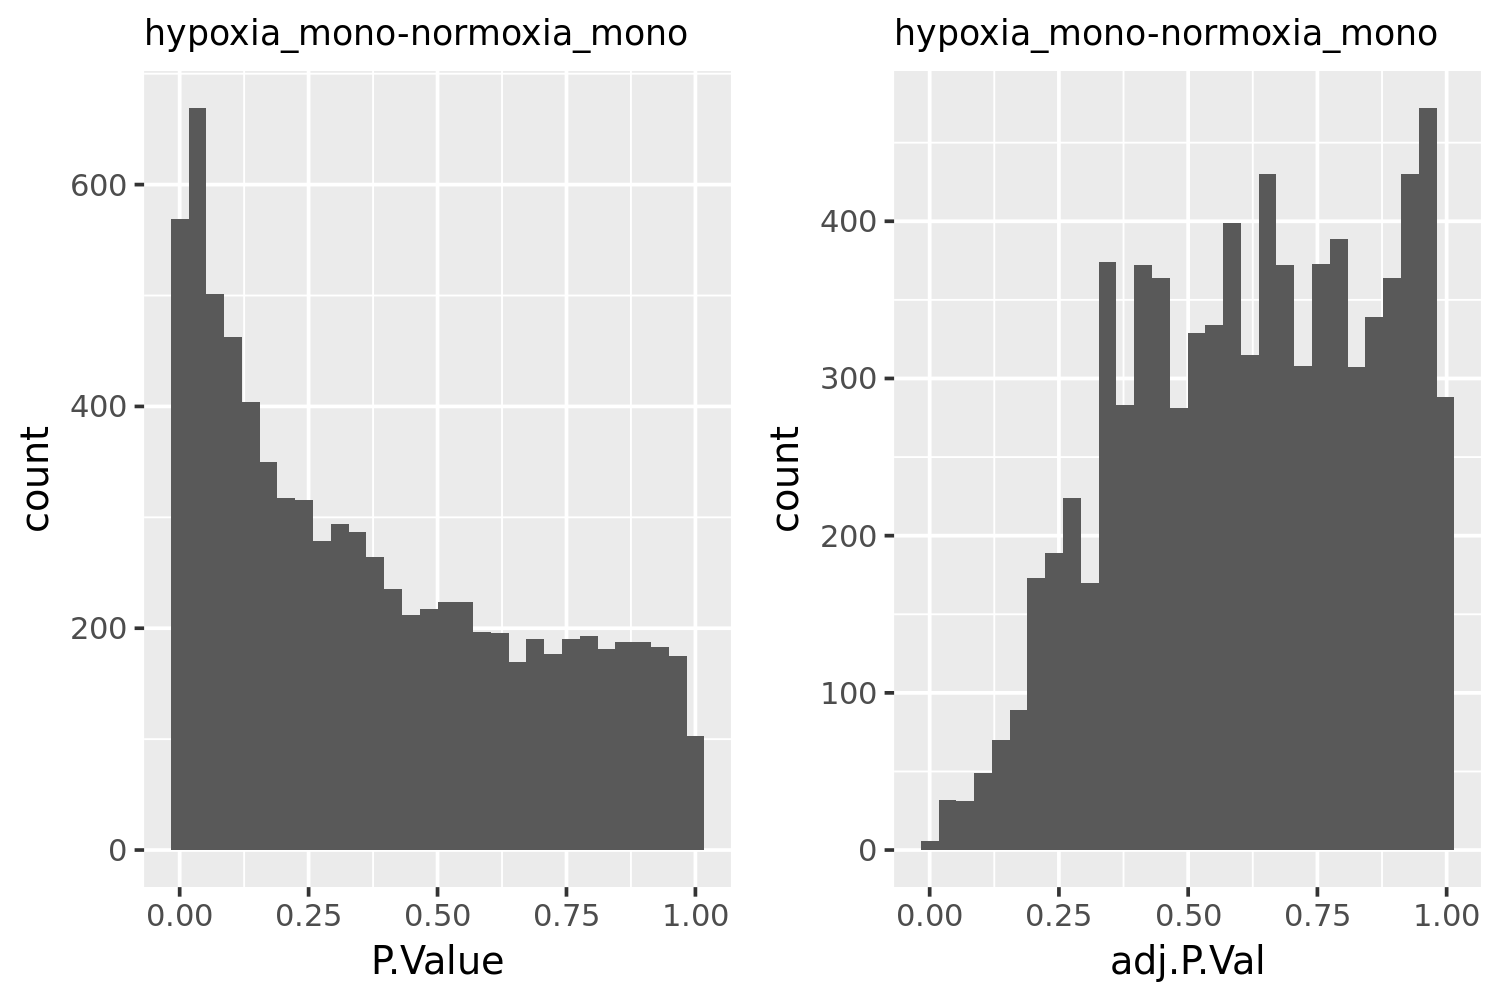

In [34]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 250)
pval_plot <- ggplot(data=res, aes(P.Value)) + geom_histogram() + ggtitle(contrast_name) + theme(plot.title = element_text(size=10))
qval_plot <- ggplot(data=res, aes(adj.P.Val)) + geom_histogram() + ggtitle(contrast_name) + theme(plot.title = element_text(size=10))
grid.arrange(pval_plot, qval_plot, ncol=2, widths=c(4,4))

Warning message:
"ggrepel: 1168 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


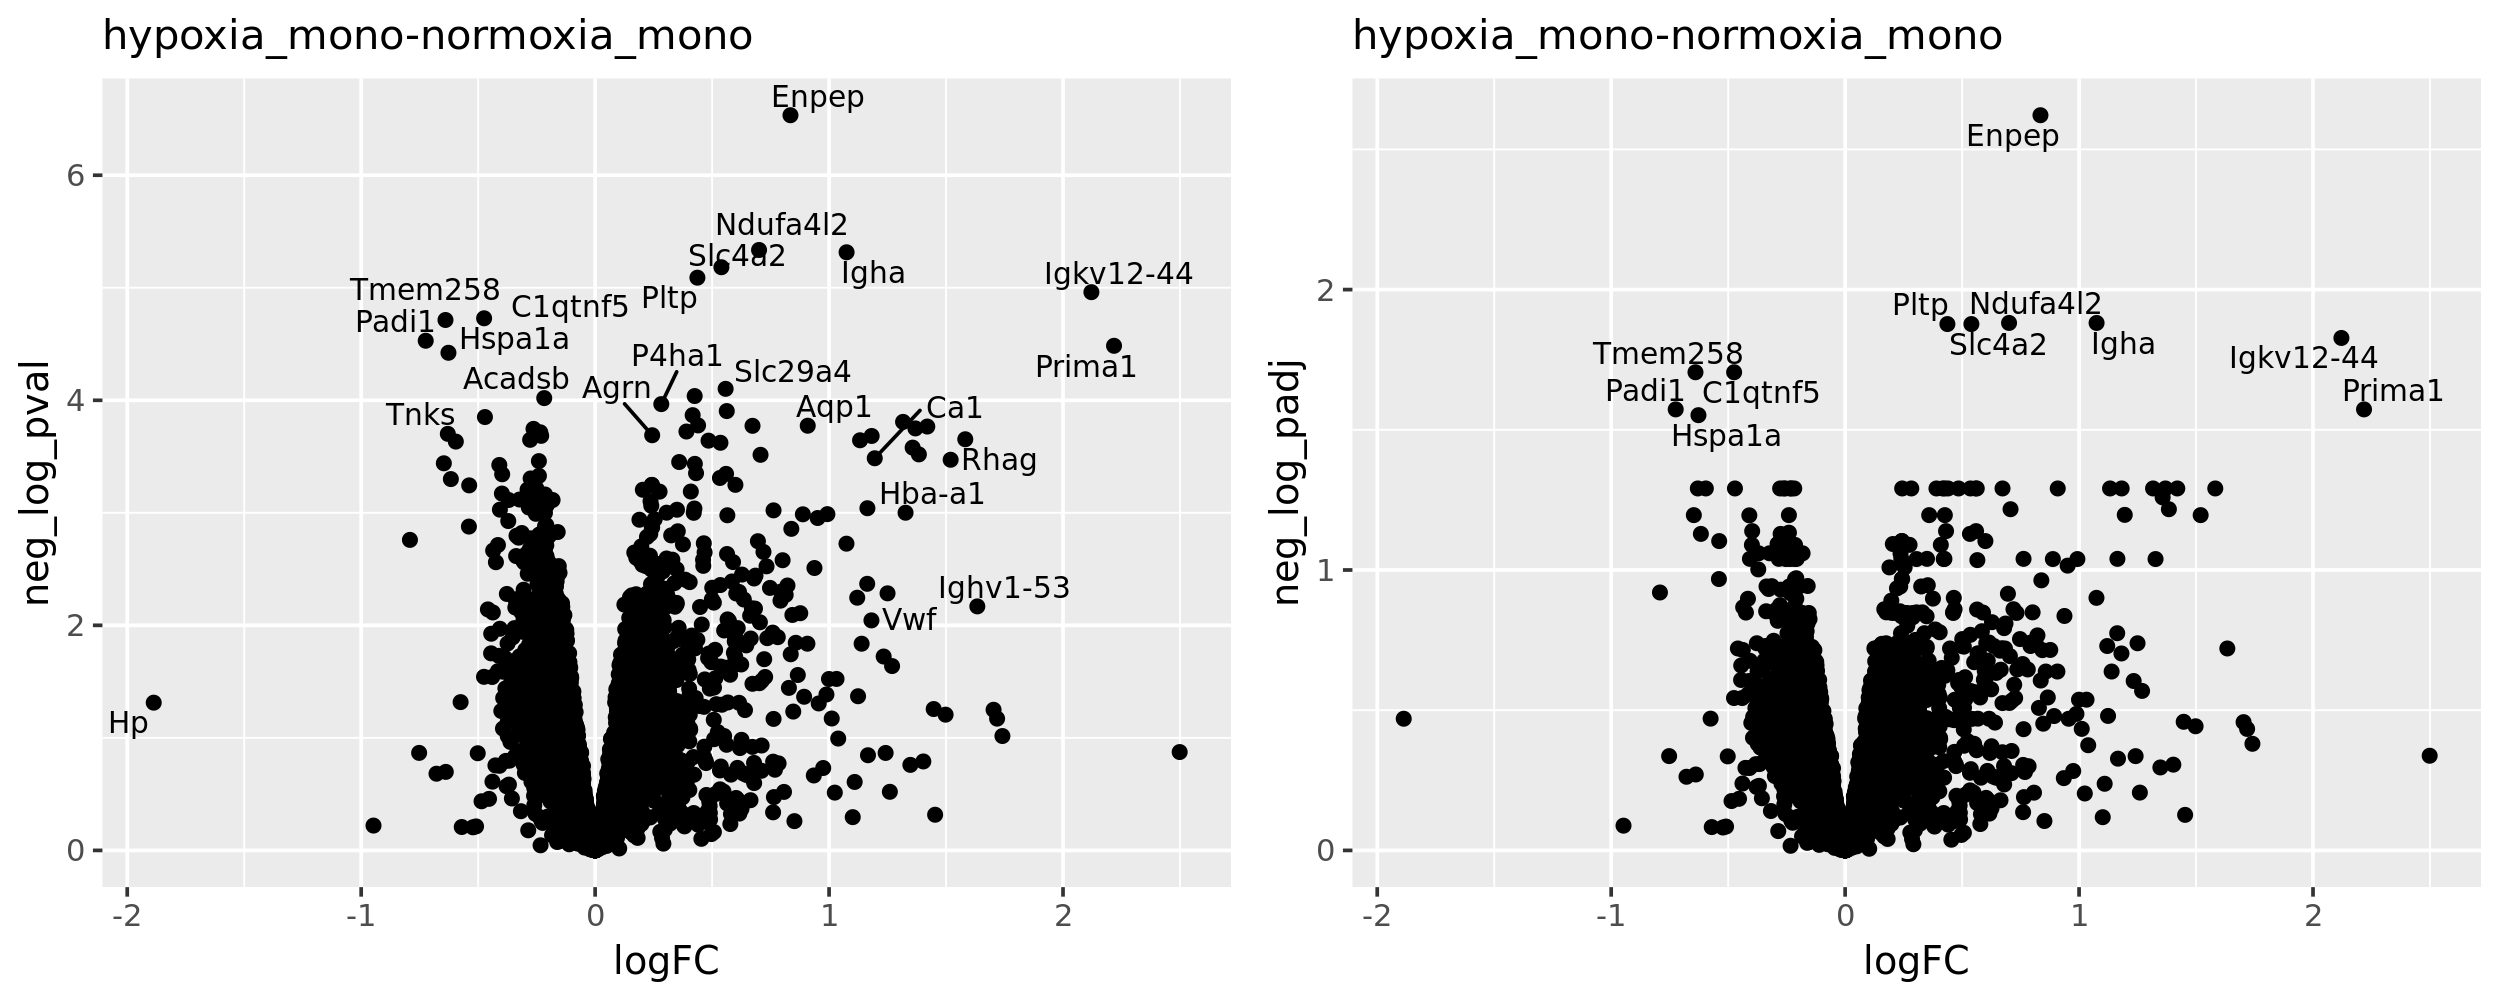

In [35]:
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 250)

pval_plot <- ggplot(data=res, aes(x=logFC, y=neg_log_pval)) + geom_point() + ggtitle(contrast_name) + theme(plot.title = element_text(size=12))
pval_plot <- pval_plot + ggrepel::geom_text_repel(data=dplyr::filter(res, P.Value < 0.05),
                                                  aes(label=GeneSymbol),
                                                  size=3, box.padding=unit(0.1, 'lines'),
                                                  point.padding=unit(0.1, 'lines'),
                                                  segment.size=0.5)

qval_plot <- ggplot(data=res, aes(x=logFC, y=neg_log_padj)) + geom_point() + ggtitle(contrast_name) + theme(plot.title = element_text(size=12))
qval_plot <- qval_plot + ggrepel::geom_text_repel(data=dplyr::filter(res, adj.P.Val < 0.05),
                                                  aes(label=GeneSymbol),
                                                  size=3, box.padding=unit(0.1, 'lines'),
                                                  point.padding=unit(0.1, 'lines'),
                                                  segment.size=0.5)

grid.arrange(pval_plot, qval_plot, ncol=2, widths=c(4,4))

In [36]:
#write.csv(res, './pd_tmt_proteomics.limma_DE_analysis.hypoxia_mono_vs_normoxia_mono.csv')

## PFF hypoxia vs PFF normoxia

In [37]:
contrast_name <- "hypoxia_PFF-normoxia_PFF"
contrast.matrix <- makeContrasts(contrast_name, levels = design)
contrast.matrix

,hypoxia_PFF-normoxia_PFF
hypoxia_PFF,1
hypoxia_mono,0
normoxia_PFF,-1
normoxia_mono,0


In [38]:
fit2C <- contrasts.fit(fit, contrast.matrix)
fit2C <- eBayes(fit2C)
res <- topTable(fit2C, number=Inf, adjust.method='BH', sort.by='P')
res['neg_log_pval'] <- 0 - log(res['P.Value'], 10)
res['neg_log_padj'] <- 0 - log(res['adj.P.Val'], 10)
res[c('ProteinID', 'GeneSymbol')] <- gene_meta[rownames(res),]
head(res, 20)

,logFC,AveExpr,t,P.Value,adj.P.Val,B,neg_log_pval,neg_log_padj,ProteinID,GeneSymbol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
7741,0.7499295,8.622376,9.926289,5.160195e-07,0.004208655,5.855402,6.287334,2.375857,P57787,Slc16a3
6362,0.3810629,9.292586,8.249739,3.441863e-06,0.010910766,4.424051,5.463206,1.962145,Q60715,P4ha1
6756,0.6646673,7.438739,8.124111,4.013278e-06,0.010910766,4.302571,5.396501,1.962145,Q4FZG9,Ndufa4l2
4439,0.5058037,9.685264,7.744940,6.448339e-06,0.013148162,3.922623,5.190552,1.881135,A0A0R4J101,Slc4a2
3948,-0.2963543,10.603989,-7.298309,1.151624e-05,0.018785296,3.448380,4.938689,1.726182,P08030,Aprt
738,-0.2362242,12.543201,-6.743270,2.449680e-05,0.031648834,2.816499,4.610891,1.499642,Q9DBL1,Acadsb
2122,-0.2936373,11.787240,-6.577870,3.091077e-05,0.031648834,2.618698,4.509890,1.499642,Q8JZR6,Slc4a8
4589,-0.2960518,10.202281,-6.574846,3.104349e-05,0.031648834,2.615041,4.508030,1.499642,Q7TNE1,Sugct
3527,0.4743098,9.963572,6.361946,4.210459e-05,0.038156116,2.353721,4.375671,1.418436,P16406,Enpep


In [39]:
sum(res$adj.P.Val < 0.05)

[1] 9

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


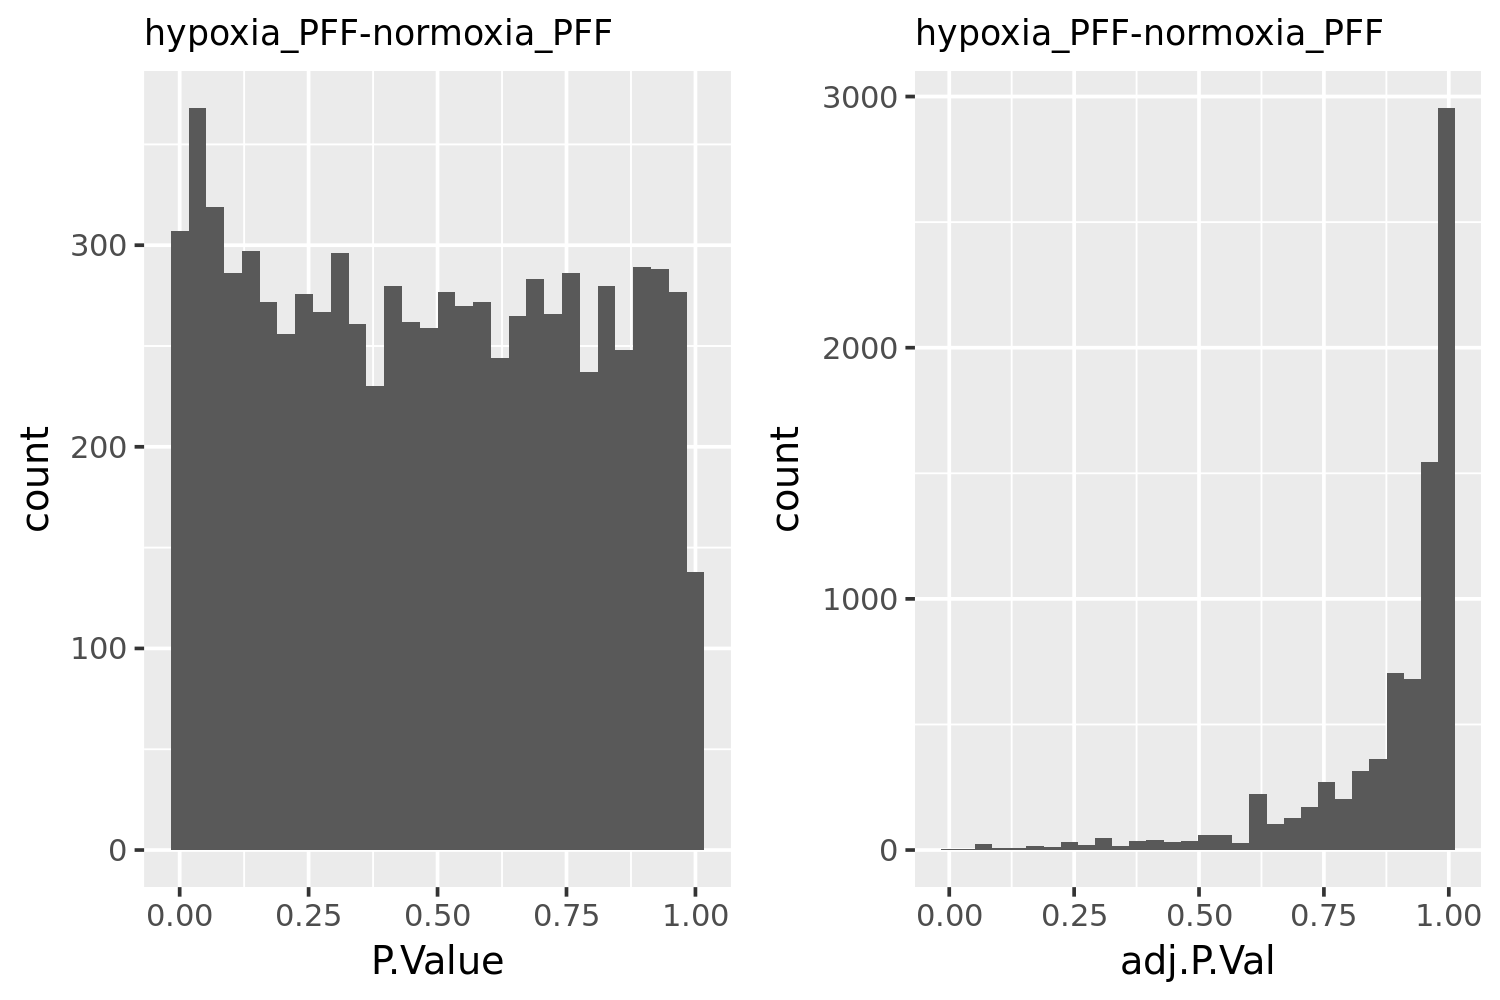

In [40]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 250)
pval_plot <- ggplot(data=res, aes(P.Value)) + geom_histogram() + ggtitle(contrast_name) + theme(plot.title = element_text(size=10))
qval_plot <- ggplot(data=res, aes(adj.P.Val)) + geom_histogram() + ggtitle(contrast_name) + theme(plot.title = element_text(size=10))
grid.arrange(pval_plot, qval_plot, ncol=2, widths=c(4,4))

Warning message:
"ggrepel: 629 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


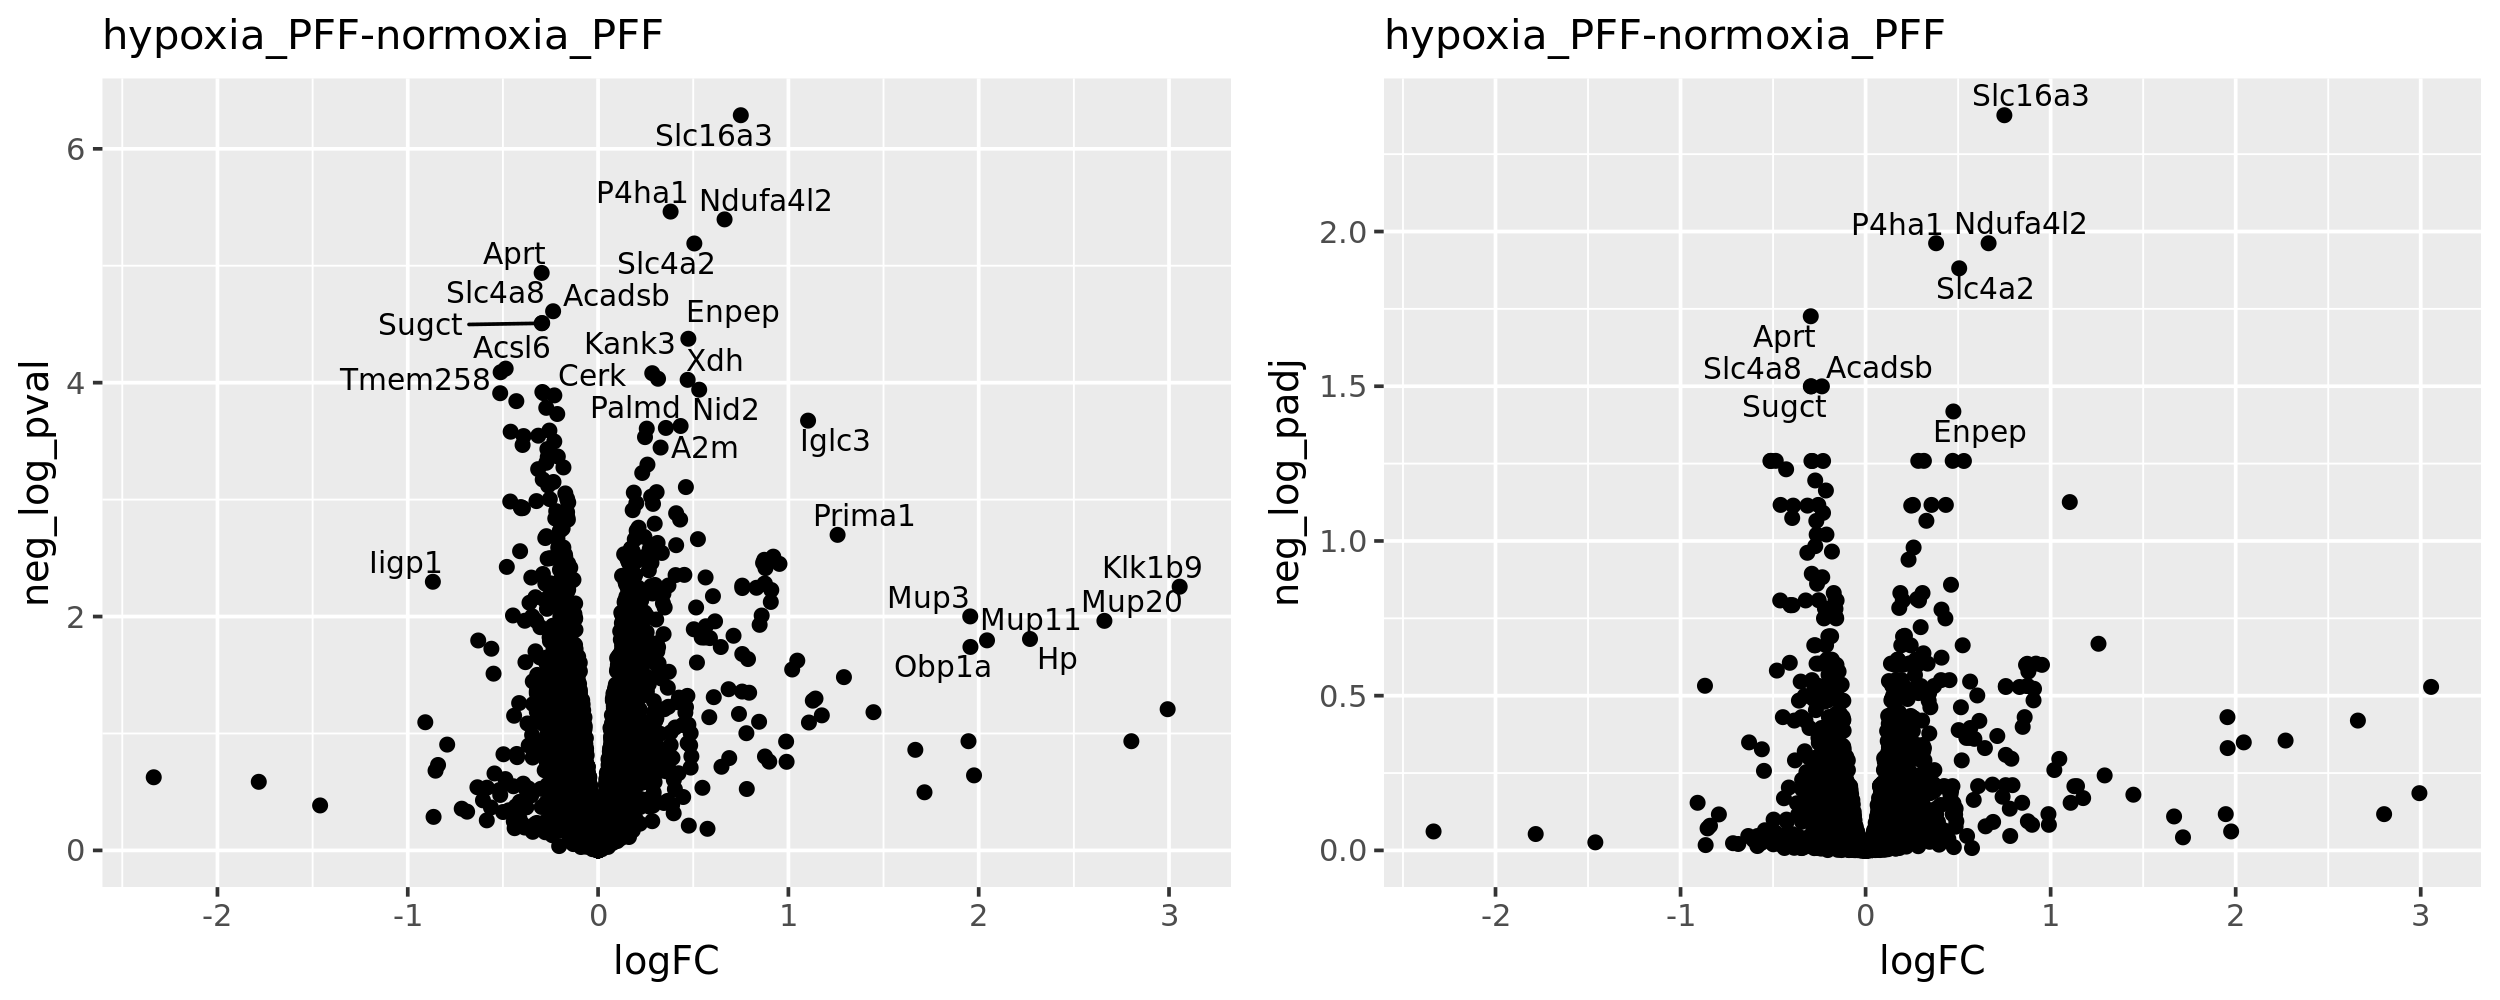

In [41]:
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 250)

pval_plot <- ggplot(data=res, aes(x=logFC, y=neg_log_pval)) + geom_point() + ggtitle(contrast_name) + theme(plot.title = element_text(size=12))
pval_plot <- pval_plot + ggrepel::geom_text_repel(data=dplyr::filter(res, P.Value < 0.05),
                                                  aes(label=GeneSymbol),
                                                  size=3, box.padding=unit(0.1, 'lines'),
                                                  point.padding=unit(0.1, 'lines'),
                                                  segment.size=0.5)

qval_plot <- ggplot(data=res, aes(x=logFC, y=neg_log_padj)) + geom_point() + ggtitle(contrast_name) + theme(plot.title = element_text(size=12))
qval_plot <- qval_plot + ggrepel::geom_text_repel(data=dplyr::filter(res, adj.P.Val < 0.05),
                                                  aes(label=GeneSymbol),
                                                  size=3, box.padding=unit(0.1, 'lines'),
                                                  point.padding=unit(0.1, 'lines'),
                                                  segment.size=0.5)

grid.arrange(pval_plot, qval_plot, ncol=2, widths=c(4,4))

In [42]:
#write.csv(res, './pd_tmt_proteomics.limma_DE_analysis.hypoxia_PFF_vs_normoxia_PFF.csv')

## PFF hypoxia vs mono normoxia

In [43]:
contrast_name <- "hypoxia_PFF-normoxia_mono"
contrast.matrix <- makeContrasts(contrast_name, levels = design)
contrast.matrix

,hypoxia_PFF-normoxia_mono
hypoxia_PFF,1
hypoxia_mono,0
normoxia_PFF,0
normoxia_mono,-1


In [44]:
fit2C <- contrasts.fit(fit, contrast.matrix)
fit2C <- eBayes(fit2C)
res <- topTable(fit2C, number=Inf, adjust.method='BH', sort.by='P')
res['neg_log_pval'] <- 0 - log(res['P.Value'], 10)
res['neg_log_padj'] <- 0 - log(res['adj.P.Val'], 10)
res[c('ProteinID', 'GeneSymbol')] <- gene_meta[rownames(res),]
head(res, 20)

,logFC,AveExpr,t,P.Value,adj.P.Val,B,neg_log_pval,neg_log_padj,ProteinID,GeneSymbol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
7822,-0.7719533,6.396610,-8.344014,3.070592e-06,0.02504375,4.1394775,5.512778,1.6013006,P61166,Tmem258
4439,0.5252685,9.685264,7.523525,8.570800e-06,0.03272465,3.3948397,5.066979,1.4851251,A0A0R4J101,Slc4a2
7741,0.5867651,8.622376,7.264986,1.203702e-05,0.03272465,3.1398617,4.919481,1.4851251,P57787,Slc16a3
6756,0.5992980,7.438739,6.852016,2.106432e-05,0.04295014,2.7109552,4.676453,1.3670354,Q4FZG9,Ndufa4l2
614,-0.6489032,12.615324,-6.661189,2.748128e-05,0.04482747,2.5034577,4.560963,1.3484558,Q61696,Hspa1a
3527,0.5188374,9.963572,6.509733,3.405432e-05,0.04629117,2.3344664,4.467828,1.3345018,P16406,Enpep
3948,-0.2650266,10.603989,-6.105265,6.129703e-05,0.07141980,1.8640392,4.212561,1.1461814,P08030,Aprt
6362,0.2959290,9.292586,5.992872,7.245947e-05,0.07387243,1.7282847,4.139905,1.1315176,Q60715,P4ha1
683,0.5777382,12.334524,5.787003,9.889002e-05,0.08961633,1.4738588,4.004848,1.0476128,O88322,Nid2


In [45]:
sum(res$adj.P.Val < 0.05)

[1] 6

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


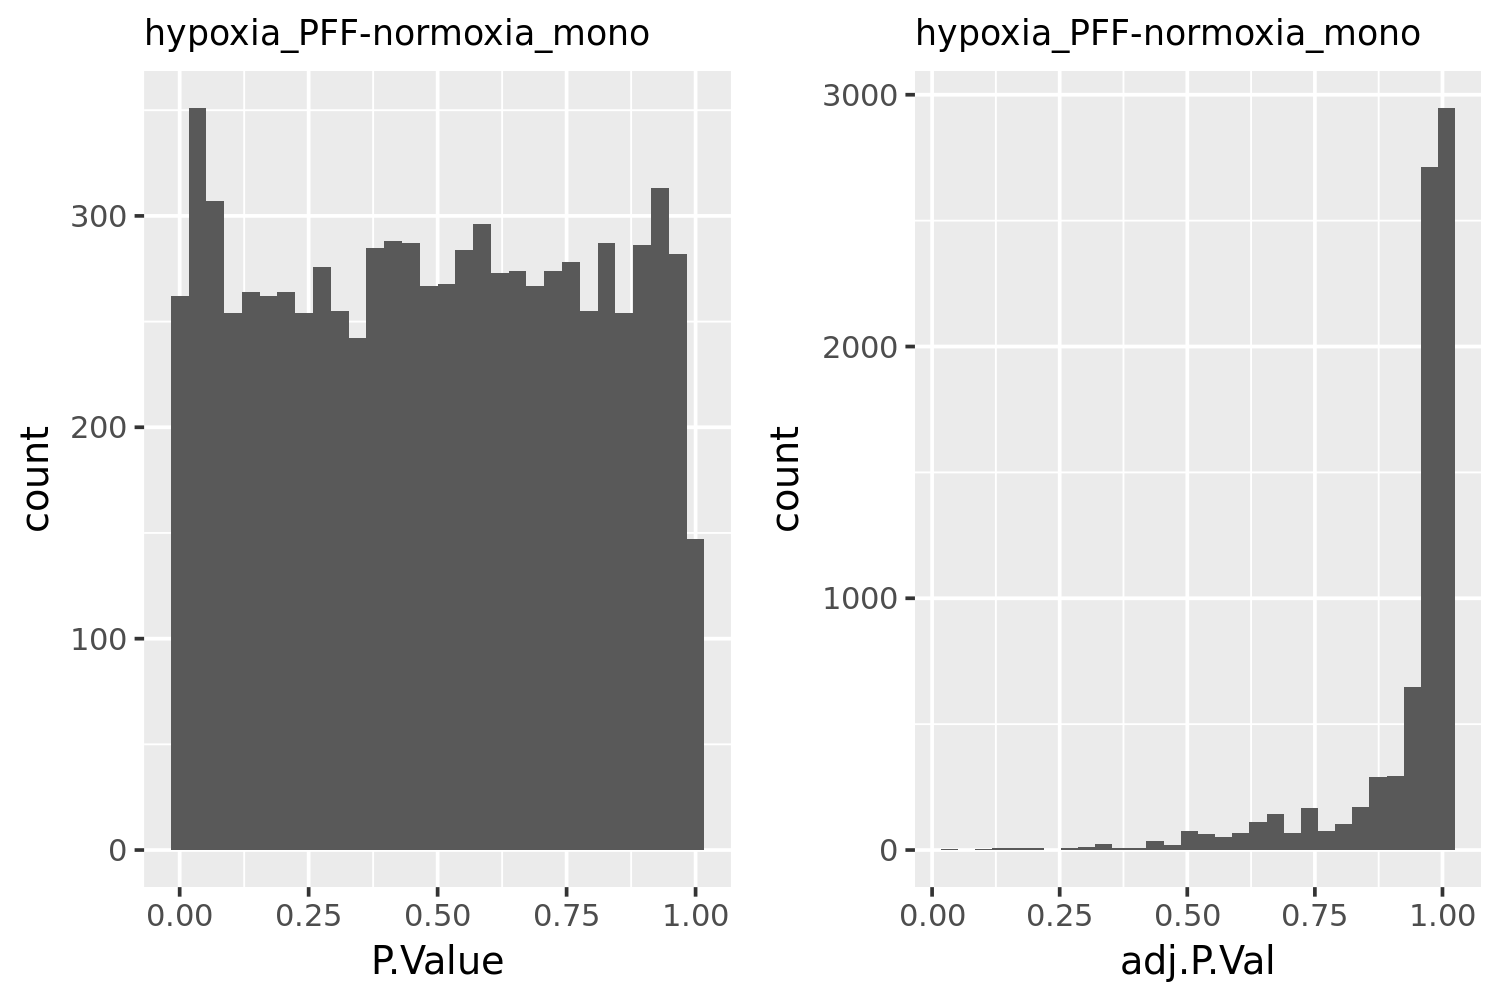

In [46]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 250)
pval_plot <- ggplot(data=res, aes(P.Value)) + geom_histogram() + ggtitle(contrast_name) + theme(plot.title = element_text(size=10))
qval_plot <- ggplot(data=res, aes(adj.P.Val)) + geom_histogram() + ggtitle(contrast_name) + theme(plot.title = element_text(size=10))
grid.arrange(pval_plot, qval_plot, ncol=2, widths=c(4,4))

Warning message:
"ggrepel: 569 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


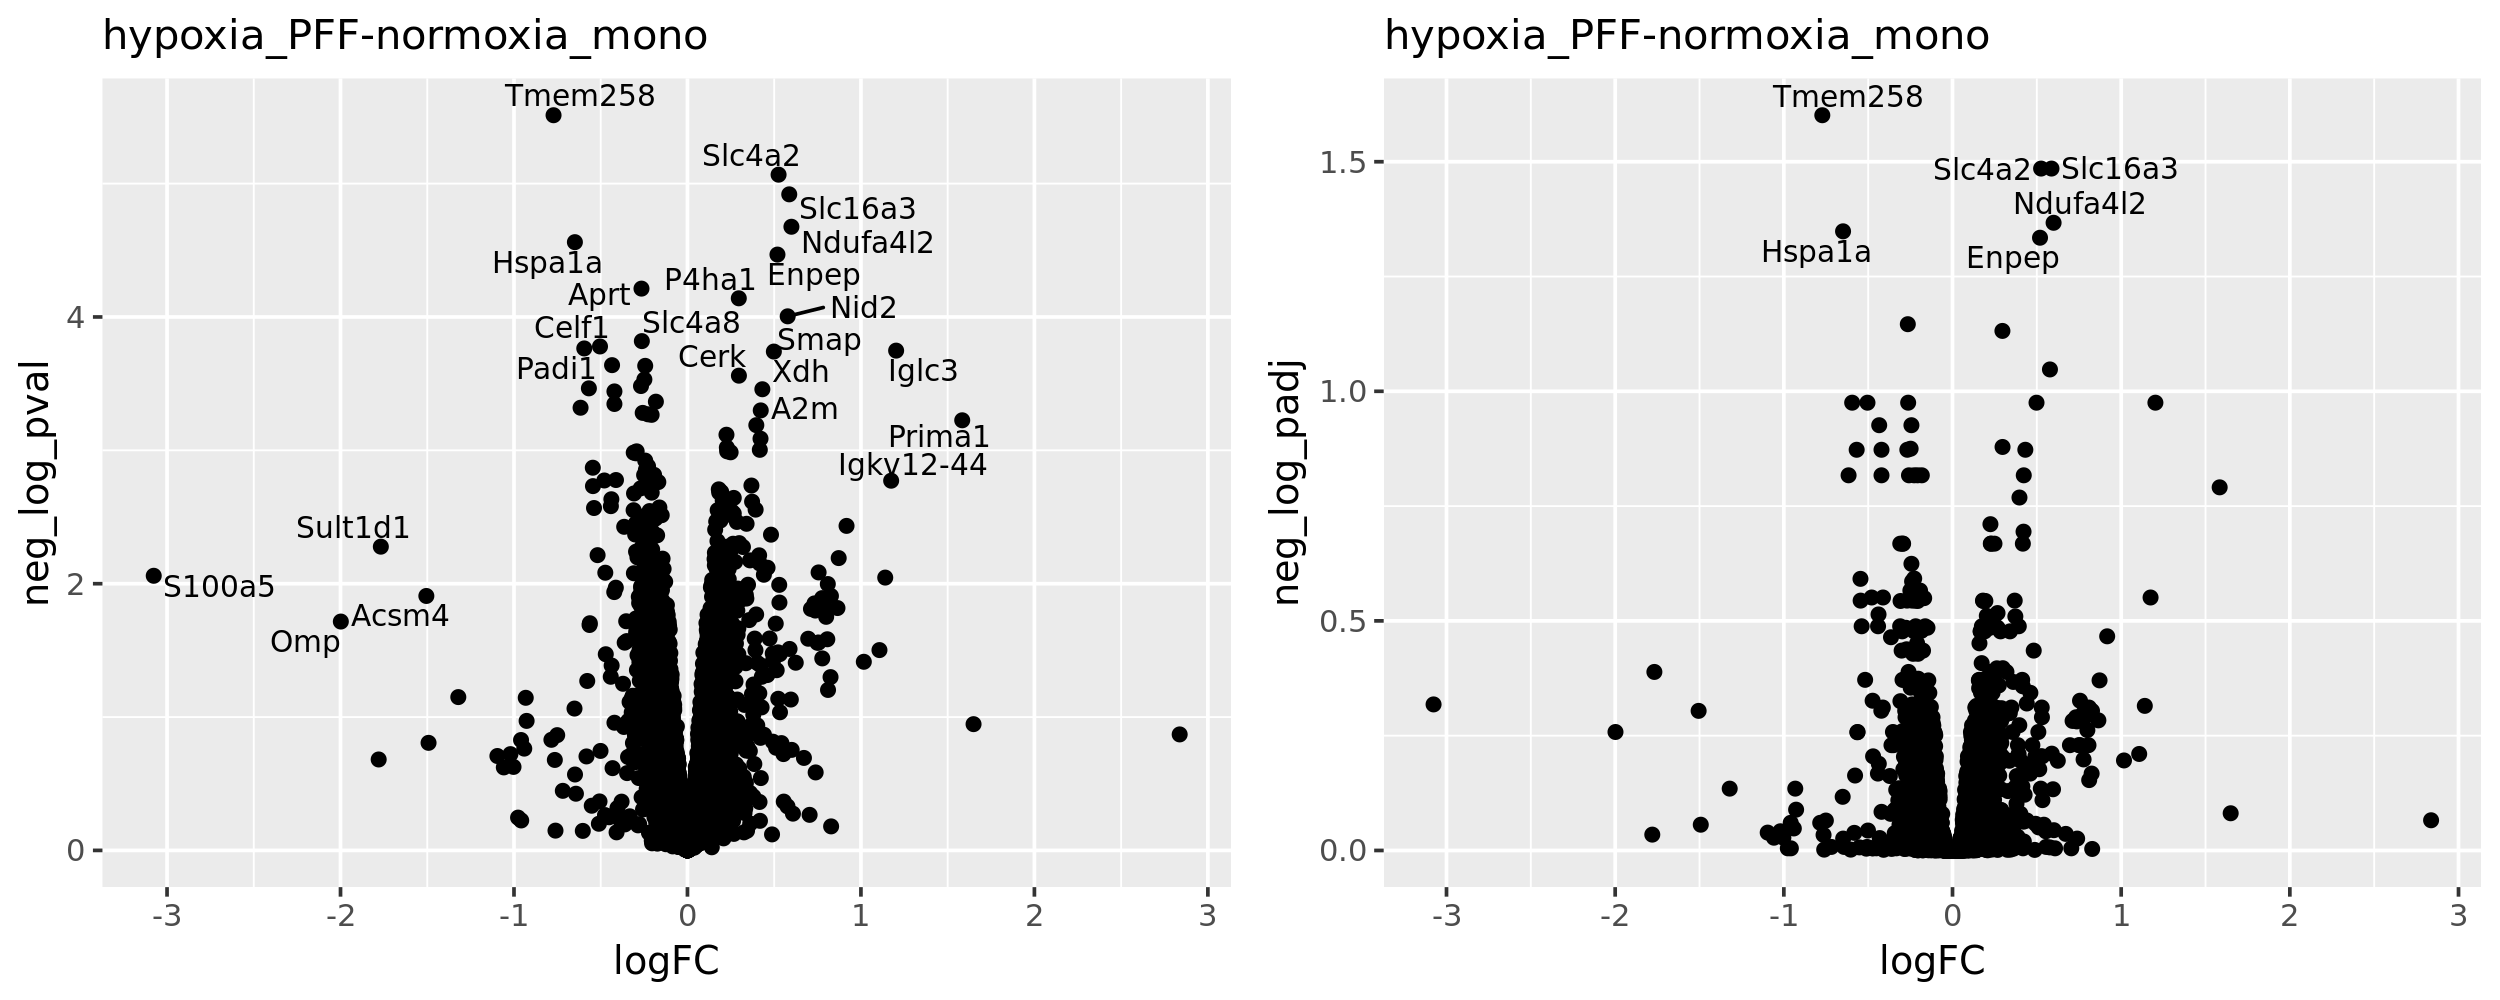

In [47]:
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 250)

pval_plot <- ggplot(data=res, aes(x=logFC, y=neg_log_pval)) + geom_point() + ggtitle(contrast_name) + theme(plot.title = element_text(size=12))
pval_plot <- pval_plot + ggrepel::geom_text_repel(data=dplyr::filter(res, P.Value < 0.05),
                                                  aes(label=GeneSymbol),
                                                  size=3, box.padding=unit(0.1, 'lines'),
                                                  point.padding=unit(0.1, 'lines'),
                                                  segment.size=0.5)

qval_plot <- ggplot(data=res, aes(x=logFC, y=neg_log_padj)) + geom_point() + ggtitle(contrast_name) + theme(plot.title = element_text(size=12))
qval_plot <- qval_plot + ggrepel::geom_text_repel(data=dplyr::filter(res, adj.P.Val < 0.05),
                                                  aes(label=GeneSymbol),
                                                  size=3, box.padding=unit(0.1, 'lines'),
                                                  point.padding=unit(0.1, 'lines'),
                                                  segment.size=0.5)

grid.arrange(pval_plot, qval_plot, ncol=2, widths=c(4,4))

In [48]:
#write.csv(res, './pd_tmt_proteomics.limma_DE_analysis.hypoxia_PFF_vs_normoxia_mono.csv')